## Descripción del proyecto

# 1. Crear el DataFrame y estudio general de la información

## Importar librerias

In [843]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Crear el Data Frame

In [762]:
data_raw = pd.read_csv("./games.csv")

## Estudio general de la información

En este punto se inicia una exploración de los datos, métodos utilizados:

    - info()
    - describe()
    - head()
    - tail()

In [763]:
print(data_raw.info()) #Se utiliza el método info() para obtener una descripción general del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [764]:
print(data_raw.describe()) #Se utiliza el método describe() para obtener las estadísticas básicas de las columnas numéricas

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  


In [765]:
#Para dar una primera observación de las columnas y los datos que contienen, se utilizan los métodos head() para imporimir las primeras 5 filas y el método tail() para las últimas 5

print("Primeras 5 filas del DataSet")

print(data_raw.head())

print()

print("Últimas 5 filas del dataset")

print(data_raw.tail())

Primeras 5 filas del DataSet
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Últimas 5 filas del dataset
                                Name Plat

# 2. Preparar los datos

    - Se reemplazan los nombres de las columnas poniéndolos en minúsculas

## Reemplazar los nombres de las columnas

In [766]:
data_raw.columns = data_raw.columns.str.lower() #Se modifica la estructura de los nombres de las columnas utilizando el método columns() 
                                                #para indicar que utilizará los nombres de columna adicionando el método lower() para hacer que sean minúsculas.

for row in data_raw.columns: #para mostrar que se han modificado los nombres de columna, se eligió utilizar el bucle for sobre las columnas del DataFrame
    print(row) #para que imprima cada nombre de columna

name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating


## Busqueda de valores duplicados y nulos

Funciones utilizadas para encontrar valores duplicados y nulos

    - duplicated().sum()

In [767]:
data_duplicated = data_raw.duplicated().sum() 

print(f"Este Data set tiene {data_duplicated} filas completamente duplicadas")

Este Data set tiene 0 filas completamente duplicadas


In [768]:
print(data_raw.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


## Manejo de valore ausentes

#### Conversiones tipo de datos y manejo de valores ausentes

In [769]:
data_raw["name"] = data_raw["name"].fillna("Desconocido") #Sustituye los valores ausentes por "Desconocido"

data_raw["genre"] = data_raw["genre"].fillna("Desconocido") #Sustituye los valores ausentes por "Desconocido"

data_raw["year_of_release"]= data_raw["year_of_release"].fillna(0).astype("int") #Sustituye los valores ausentes por 0 y cambia el tipo de dato a entero

data_raw["user_score"] = data_raw["user_score"].replace("tbd", np.nan).astype("float") #Reemplaza los "tbd" por valores nulos y cambia el tipo de dato a float

data_raw["rating"] = data_raw["rating"].fillna("Desconocido") #Sustituye los valores ausentes por "Desconocido"

#### Justificación manejo de valores ausentes

Los valores ausentes en las columnas "name", "genre" y "rating" se manejaron sustituyéndolos por el string "Desconocido" ya que si bien no se conoce su descripción, el resto de los valores de la fila son relevantes para el análisis. Los valores podrían estar ausentes debido a alguna falla en el registro o en el momento de recolectar la información.

Los valores ausentes de la columna "year_of_release" se rellenaron con 0, ya que esto no afectaba a la columna, pues no se hacen operaciones aritmeticas comunmente sobre los años, más bien se agrupan. Los valores podrían estar ausentes debido a alguna falla en el registro o en el momento de recolectar la información.

Para la columna "user_score" se reemplazó el string "tbd" con valores ausentes nan, debido a que se desconoce el valor dado y que al ser una puntuación si utilizo cualquier valor diferente a ausente estaría modificando el score de los juegos, aún poniendo un 0, pues estaría indicando un score de 0 para un determinado juego

In [770]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


## Cálculo de las ventas totales de todas las regiones

In [771]:
data_raw["ventas_totales"] = data_raw[["na_sales", "eu_sales","jp_sales","other_sales"]].sum(axis=1) #Calculo de ventas totales

# 3. Análisis de los datos

In [867]:
mejores_juegos_5 = data_raw.nlargest(5,["ventas_totales"]) #Encuentra los 5 juegos mejor vendidos, independiente a la plataforma, año, género, crítica, usuario, rating
print(mejores_juegos_5)

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score       rating  \
0     28.96      3.77         8.45          76.0         8.0            E   
1      3.58      6.81         0.77           NaN         NaN  Desconocido   
2     12.76      3.79         3.29          82.0         8.3            E   
3     10.93      3.28         2.95          80.0         8.0            E   
4      8.89     10.22         1.00           NaN         NaN  Desconocido   

   ventas_totales  
0           82.54  
1         

### Juegos lanzados por año

In [868]:
numero_de_juegos_por_año = data_raw.groupby(["year_of_release"])["name"].count().sort_values(ascending=False).reset_index() #Juegos lanzados por año
numero_de_juegos_por_año.columns = ["año_de_lanzamiento","cantidad_de_videojuegos"] #Cambia el nombre de las columnas
numero_de_juegos_por_año.query("año_de_lanzamiento != 0",inplace=True) #Filtra todo lo que no sea igual a 0, es decir, que no tiene año de lanzamiento
print(numero_de_juegos_por_año) #Imprime la tabla

    año_de_lanzamiento  cantidad_de_videojuegos
0                 2008                     1427
1                 2009                     1426
2                 2010                     1255
3                 2007                     1197
4                 2011                     1136
5                 2006                     1006
6                 2005                      939
7                 2002                      829
8                 2003                      775
9                 2004                      762
10                2012                      653
11                2015                      606
12                2014                      581
13                2013                      544
14                2016                      502
15                2001                      482
16                1998                      379
17                2000                      350
18                1999                      338
19                1997                  

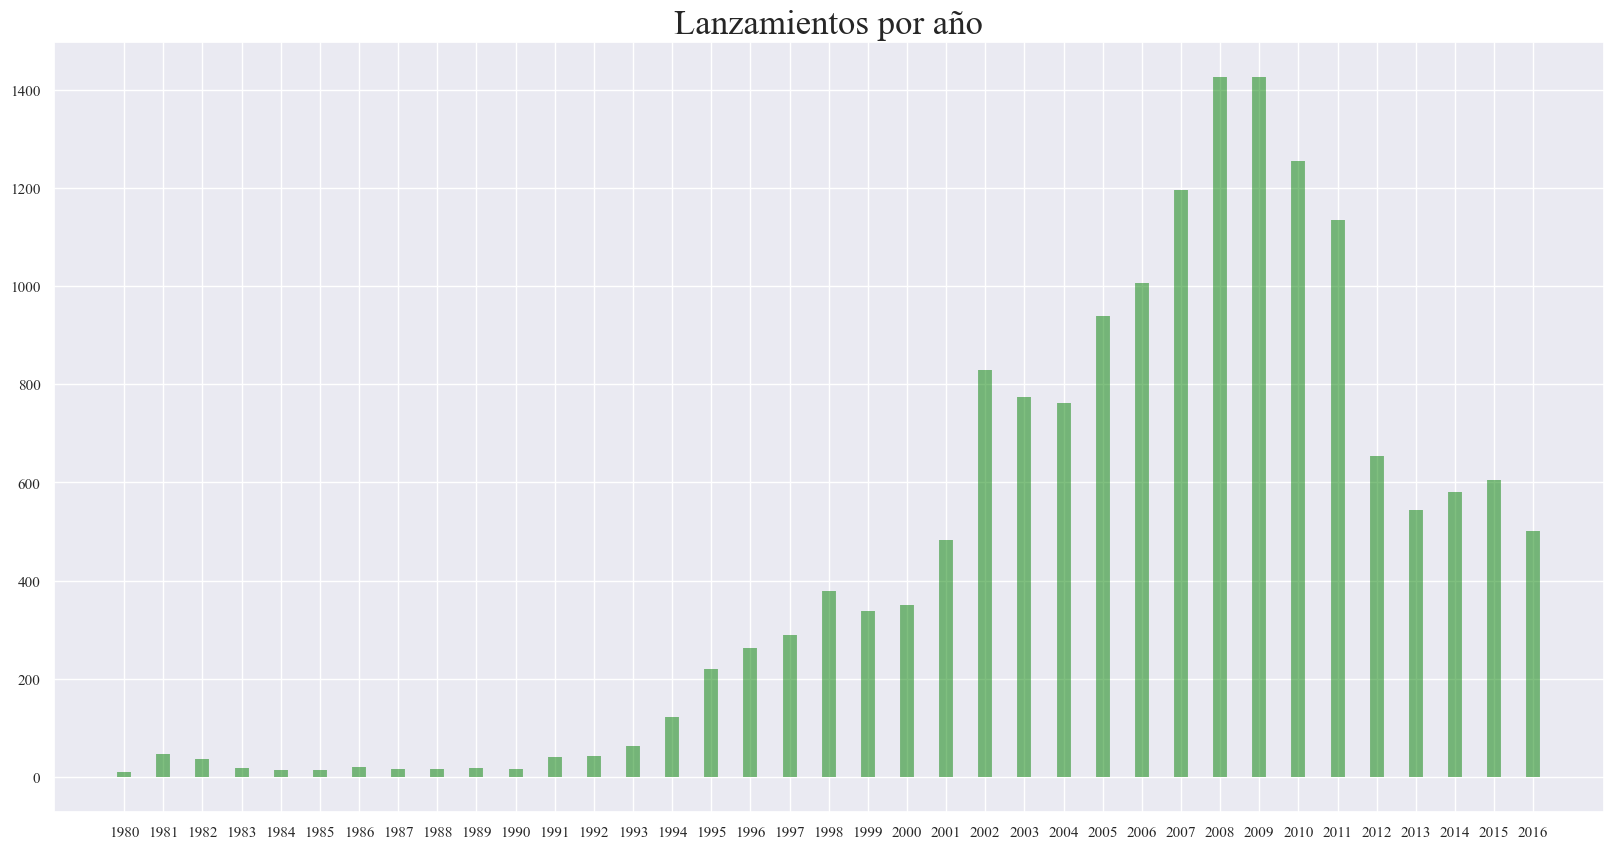

In [774]:
plt.figure(figsize=(20,10))
plt.vlines(x=numero_de_juegos_por_año.año_de_lanzamiento, 
           ymin=0, 
           ymax=numero_de_juegos_por_año.cantidad_de_videojuegos, 
           alpha=0.5, 
           linewidth=10, 
           colors="green")

plt.title("Lanzamientos por año", fontsize = 25)
plt.xticks(numero_de_juegos_por_año['año_de_lanzamiento'].unique())



plt.show()

Observando la tabla anterior, que agrupa los datos por año de lanzamiento y cuenta la cantidad de juegos lanzados, podría indicar que son signficativos los datos contenidos en el Dataset, ya que se observa una tendencia a la alza, lo cual es congruente con el crecimiento y la popularización de los videojuegos Y considerando los años en que las principales plataformas fueron lanzadas y popularizadas entre un público amplio.

Enetre 2008 y 2009 se alcanza la mayor cantidad de juegos lanzados.

## Variación de las ventas por plataforma

In [869]:
ventas_por_plataforma = data_raw.groupby("platform")["ventas_totales"].sum().sort_values(ascending=False).reset_index()

print(ventas_por_plataforma.head(5)) #hacer gráfico para c/u

  platform  ventas_totales
0      PS2         1255.77
1     X360          971.42
2      PS3          939.65
3      Wii          907.51
4       DS          806.12


La tabla anterior muestra las 5 principales plataformas en todas las regiones, mostrando que PS2, X360, PS3, wii y DS están en el top 5 de ventas, a continuación, mediante la herramienta estadística "Puntaje Z" se buscará medir la distancia de las ventas de cada plataforma respecto a la media del total de ventas. 

### Puntaje Z

Esta herramienta estadística tiene como objetivo medir la desviación de las ventas de cada plataforma en relación con la media de las ventas totales. Si las ventas de una plataforma son superiores al promedio, se pueden considerar relevantes para el análisis, ya que se encuentran por encima de la media. En caso contrario, si las ventas son inferiores al promedio, su impacto en el análisis sería menos significativo.

In [776]:
#Puntaje Z

ventas_por_plataforma["z_score"] = (ventas_por_plataforma["ventas_totales"] - ventas_por_plataforma["ventas_totales"].mean())/ventas_por_plataforma["ventas_totales"].std()

In [777]:
ventas_por_plataforma["color"] = ["red" if puntaje <= 0 else "green" for puntaje in ventas_por_plataforma["z_score"]]

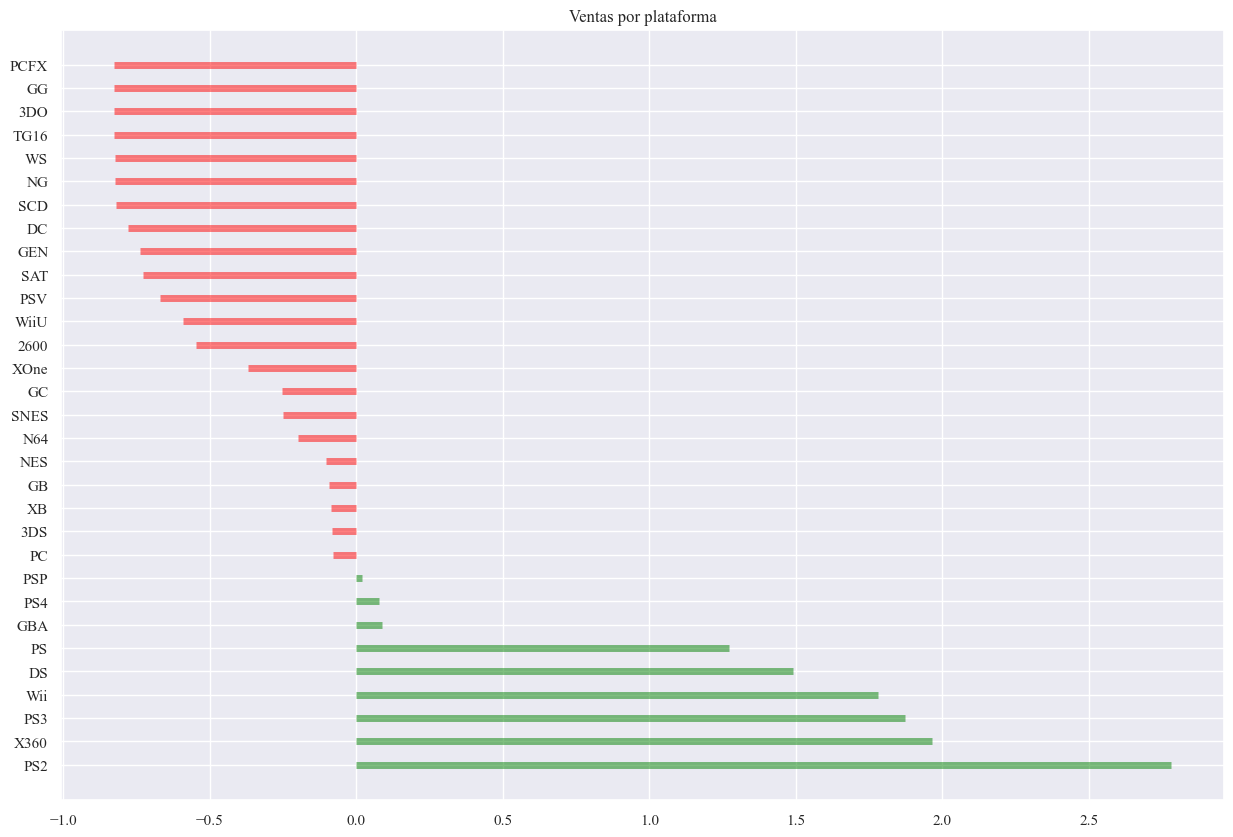

In [778]:
plt.hlines(
    y=ventas_por_plataforma.platform,
    xmin=0,
    xmax=ventas_por_plataforma.z_score,
    colors=ventas_por_plataforma.color,
    linewidth = 5,
    alpha = 0.5
)

plt.title("Ventas por plataforma") #Permite ver la rentabilidad
plt.show()

La plataforma más relevante es la PS2, que supera la media en un factor de 2.5, lo que indica que ha registrado las mayores ventas a lo largo del tiempo, según los datos de este dataset.

En cuanto a las plataformas que están una vez por encima del promedio, las más destacadas, en orden descendente, son:

- PS2
- X360
- PS3
- Wii
- DS
- PS

Este resultado concuerda con la tabla presentada anteriormente, lo que nos permite concluir que estas son las plataformas con mayores ventas y relevancia.

In [779]:
tiempo_de_vida_plataforma = pd.pivot_table(
    data_raw,
    index="year_of_release",
    columns="platform",
    values="ventas_totales",
    aggfunc="sum"
).fillna(0)

In [870]:
print(tiempo_de_vida_plataforma)

platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
0                10.50  0.00   1.19  0.00    3.34   1.03   4.97   2.20   0.00   
1980             11.38  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1981             35.68  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1982             28.88  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1983              5.84  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1984              0.27  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1985              0.45  0.00   0.00  0.00    0.02   0.00   0.00   0.00   0.00   
1986              0.67  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1987              1.94  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1988              0.74  0.00   0.00  0.00    0.00   1.43   0.00   0.00   0.00   
1989              0.63  0.00

### Distribución por año de las plataformas con mayores ventas totales

In [871]:
tiempo_de_vida_plataforma_top_5 = tiempo_de_vida_plataforma[["PS2","X360","PS3","Wii","DS"]] #Reduce el Dataframe para que únicamente contenga las columnas sobre las principales plataformas
tiempo_de_vida_plataforma_top_5 = tiempo_de_vida_plataforma_top_5.query("year_of_release >= 1998") #Para este TOP 5 se omiten datos del año 1998 hacia atrás,
                                                                                                   #ya que es cuando aparece los primero registros para la plataforma PS2 (la más antigua del TOP)
print(tiempo_de_vida_plataforma_top_5)

platform            PS2    X360     PS3     Wii      DS
year_of_release                                        
1998               0.00    0.00    0.00    0.00    0.00
1999               0.00    0.00    0.00    0.00    0.00
2000              39.17    0.00    0.00    0.00    0.00
2001             166.43    0.00    0.00    0.00    0.00
2002             205.38    0.00    0.00    0.00    0.00
2003             184.31    0.00    0.00    0.00    0.00
2004             211.81    0.00    0.00    0.00   17.27
2005             160.66    8.25    0.00    0.00  130.14
2006             103.42   51.62   20.96  137.15  119.81
2007              75.99   95.41   73.19  152.77  146.94
2008              53.90  135.26  118.52  171.32  145.31
2009              26.40  120.29  130.93  206.97  119.54
2010               5.64  170.03  142.17  127.95   85.02
2011               0.45  143.84  156.78   59.65   26.18
2012               0.00   99.74  107.36   21.71   11.01
2013               0.00   88.58  113.25    8.59 

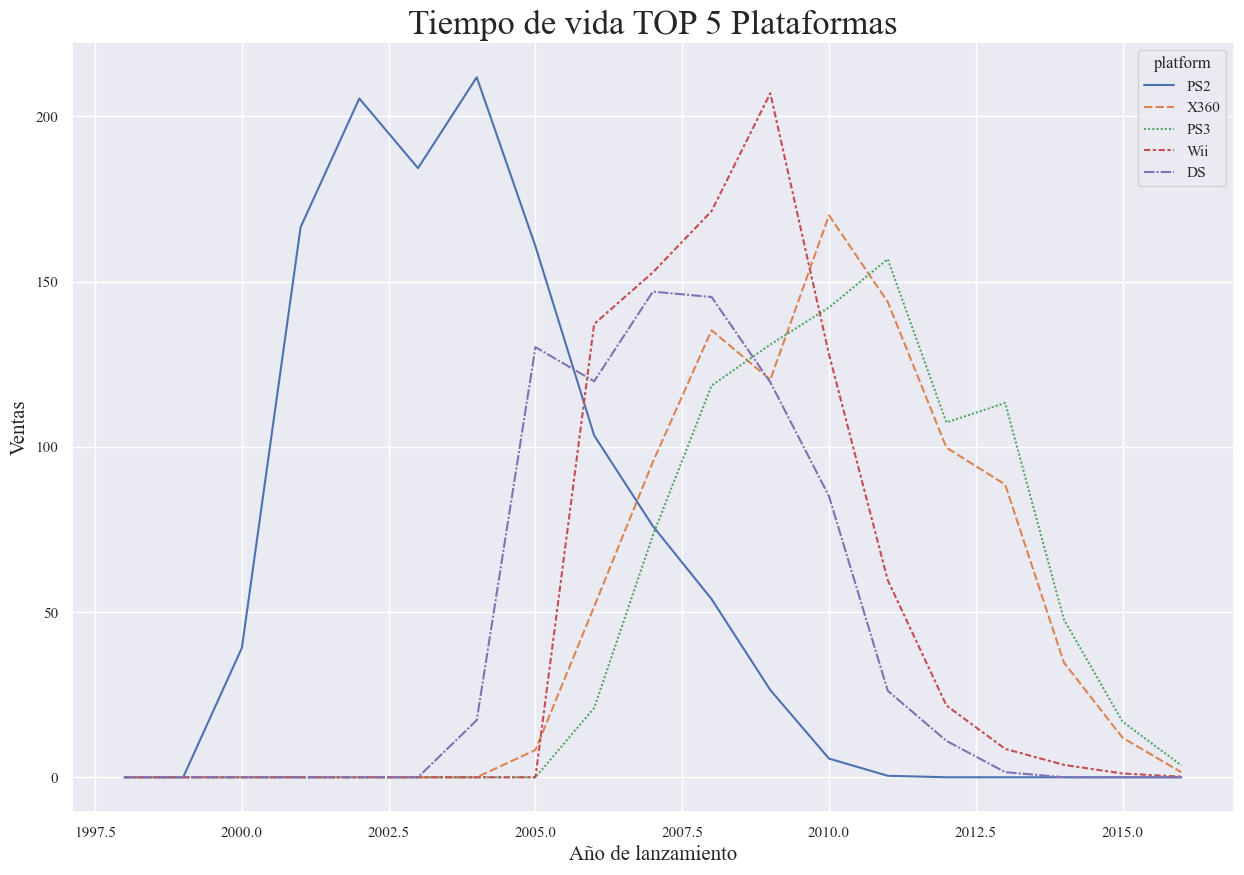

In [782]:
sns.lineplot(data=tiempo_de_vida_plataforma_top_5)
plt.title("Tiempo de vida TOP 5 Plataformas", fontsize=25)
plt.xlabel("Año de lanzamiento", fontsize=15)
plt.ylabel("Ventas", fontsize=15)


plt.show()

SSS

### Plataformas que solían ser populares

In [872]:
tiempo_de_vida_plataforma_general = tiempo_de_vida_plataforma.iloc[1:]
print(tiempo_de_vida_plataforma_general)

platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980             11.38  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1981             35.68  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1982             28.88  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1983              5.84  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1984              0.27  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1985              0.45  0.00   0.00  0.00    0.02   0.00   0.00   0.00   0.00   
1986              0.67  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1987              1.94  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1988              0.74  0.00   0.00  0.00    0.00   1.43   0.00   0.00   0.00   
1989              0.63  0.00   0.00  0.00    0.00  64.97   0.00   0.00   0.00   
1990              0.00  0.00

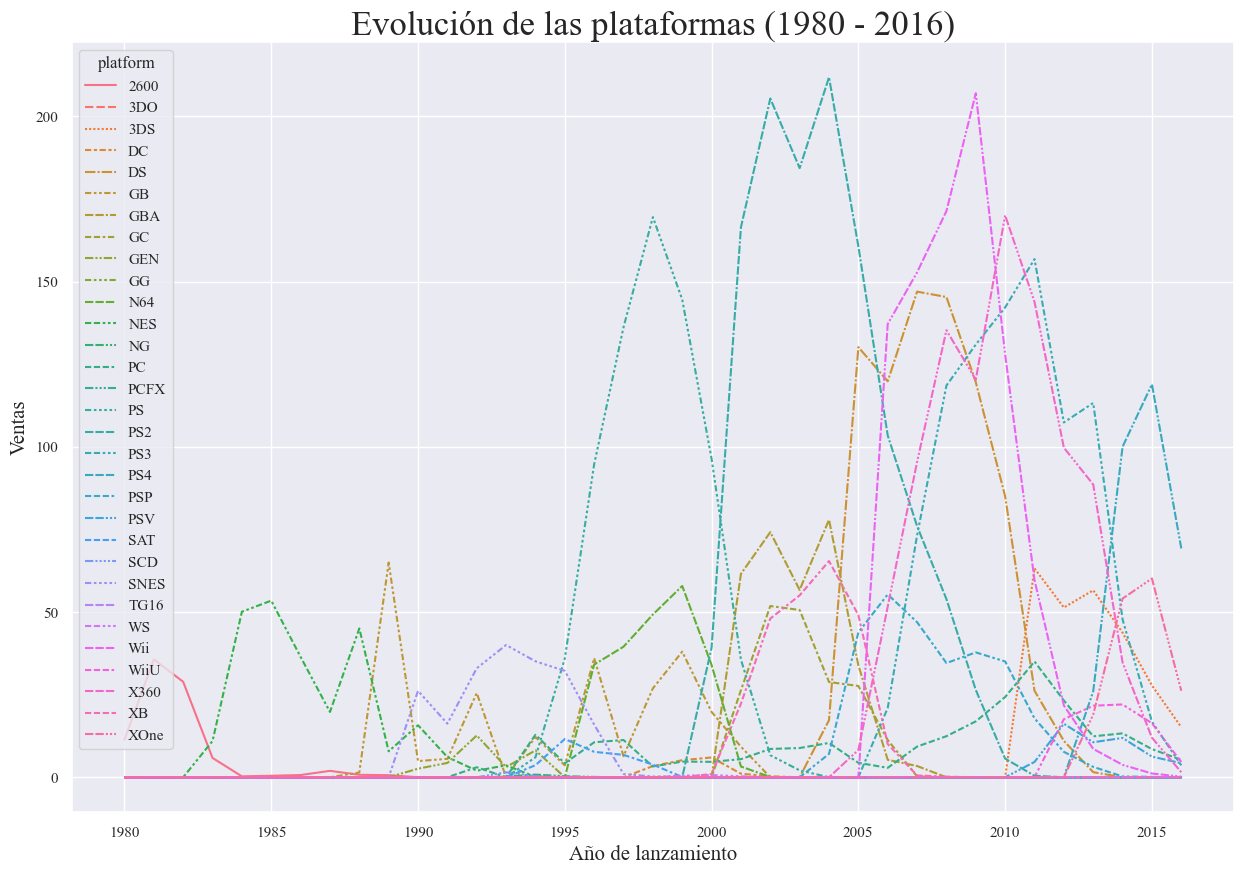

In [784]:
sns.lineplot(data=tiempo_de_vida_plataforma_general)
plt.title("Evolución de las plataformas (1980 - 2016)", fontsize=25)
plt.xlabel("Año de lanzamiento", fontsize=15)
plt.ylabel("Ventas", fontsize=15)


plt.show()


### ¿Cuánto tardan en aparecer las nuevas plataformas y cuánto tardan en desaparecer?
Observando el gráfico anterior, podría inferir que las nuevas plataformas tienden a aparecer cada 5 a 10 años, y las antiguas plataformas suelen desaparecer en un periodo de 5 a 10 años después de su pico de lanzamientos.

## Determinación del periodo a analizar

Basado en el gráfico anterior y con el objetivo de que los datos sean relevantes para construir el modelo para 2017, se decide utilizar información comprendida entre 2012 y 2016. Esto se debe a que, aunque los datos de la década de los 90's son valiosos, los juegos de esa época ya no se distribuyen en grandes cantidades, lo que hace que su impacto en las ventas de 2017 sea mínimo. Los compradores de esos juegos pueden considerarse un nicho específico, y para los años 2010-2012, su cuota de mercado ya no es significativa.

Por otro lado, a partir de 2010 - 2012, se observan los picos más altos de plataformas como Xbox, PlayStation y Wii, además de la creciente popularidad de los videojuegos, que dejaron de ser consumidos solo por un sector específicp de la población global.

In [785]:
clean_data = data_raw[data_raw["year_of_release"] >= 2012] #Filtra el DataFrame prinicipal para que únicamente contenga información de 2012 en adelante.

In [786]:
nuevo_tiempo_de_vida = clean_data.pivot_table(
    index = "year_of_release",
    columns="platform",
    values="ventas_totales",
    aggfunc="sum"
).fillna(0)

In [873]:
print(nuevo_tiempo_de_vida)

platform           3DS     DS     PC     PS3     PS4   PSP    PSV    Wii  \
year_of_release                                                            
2012             51.36  11.01  23.22  107.36    0.00  7.69  16.19  21.71   
2013             56.57   1.54  12.38  113.25   25.99  3.14  10.59   8.59   
2014             43.76   0.00  13.28   47.76  100.00  0.24  11.90   3.75   
2015             27.78   0.00   8.52   16.82  118.90  0.12   6.25   1.14   
2016             15.14   0.00   5.25    3.60   69.25  0.00   4.25   0.18   

platform          WiiU   X360   XOne  
year_of_release                       
2012             17.56  99.74   0.00  
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15  


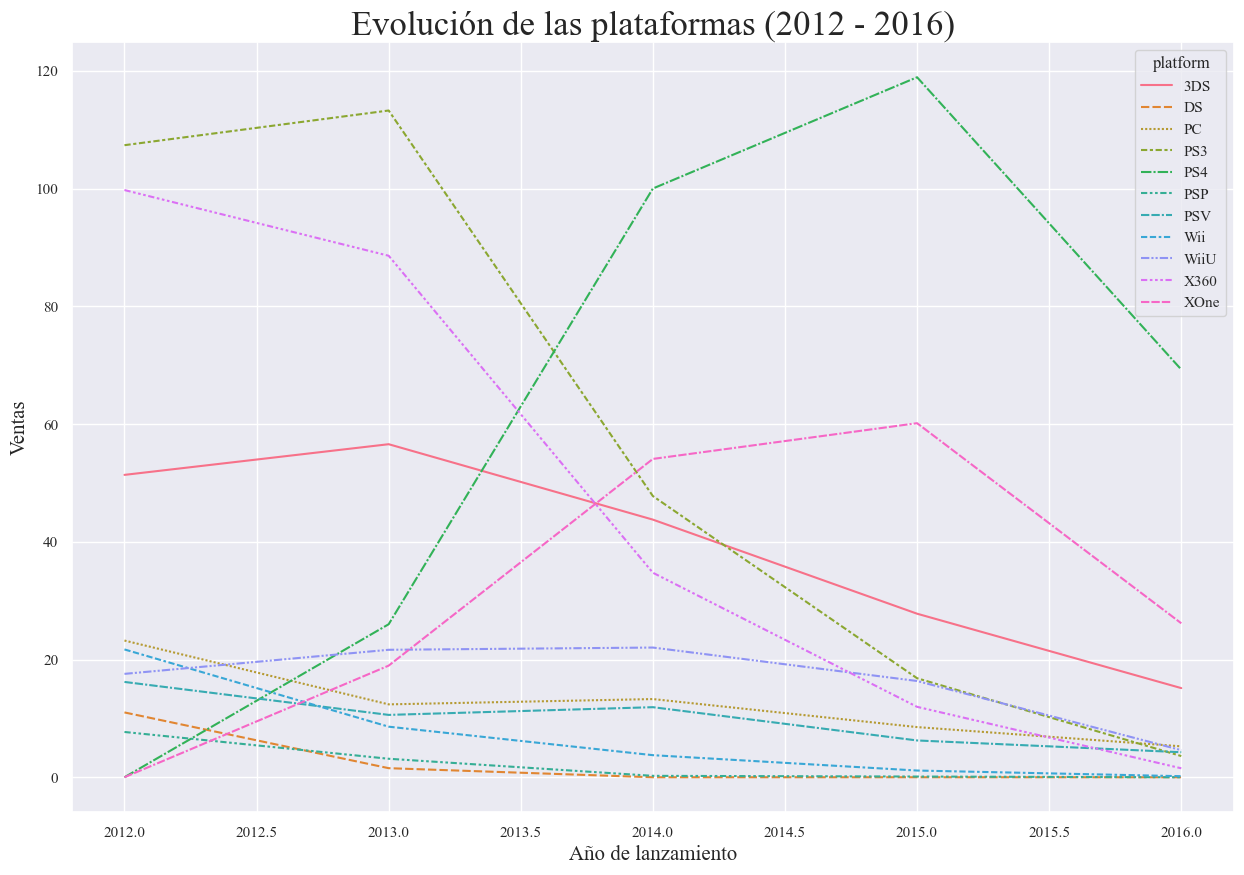

In [788]:
sns.lineplot(data=nuevo_tiempo_de_vida)
plt.title("Evolución de las plataformas (2012 - 2016)", fontsize=25)
plt.xlabel("Año de lanzamiento", fontsize=15)
plt.ylabel("Ventas", fontsize=15)


plt.show()

## Plataformas líderes en ventas

Las plataformas líderes son PS y Xbox. El gráfico muestra la evolución de cada plataforma, aunque en esta última gráfica se observe un decrecimiento, este se da cuando una nueva versión sale al mercado, por ejemplo, el PS3 cae en ventas, sin embargo, desde 2012 se lanza el PS4 y con ello recupera participación en el mercado. 

Un comportamiento similar tiene Xbox, mientras el X360 va decreciendo en ventas, aparece un incremento en el XOne, aunque no de forma tan notoria como su antesesor y es superado por PS4.

Este comportamiento ha sido visto en la evolución de todas las plataformas, tienen un auge y una decaida al salir una nueva versión o un nuevo producto. Para el modelo 2017 utilizar los datos de PS y Xbox será útil.

Considero relevante mencionar que la PC, apesar de no tener una cuota de mercado muy alta, la compra de estos productos es más generalizada y basta con solo comprar un juego e instalarlo, a diferencia de Xbox y PlayStation que requiere comprarse la consolia, por lo que considerarla dentro del modelo es relevante.

Al haberse elegido utilizar datos desde 2012, en este periodo Microsoft y PlayStation tienen una alta participación del mercado sin importar la versión de la consola.

## BOXPLOT ventas globales por plataforma

In [789]:
box_plot_data = clean_data.groupby(["year_of_release","platform"])["ventas_totales"].sum().reset_index()

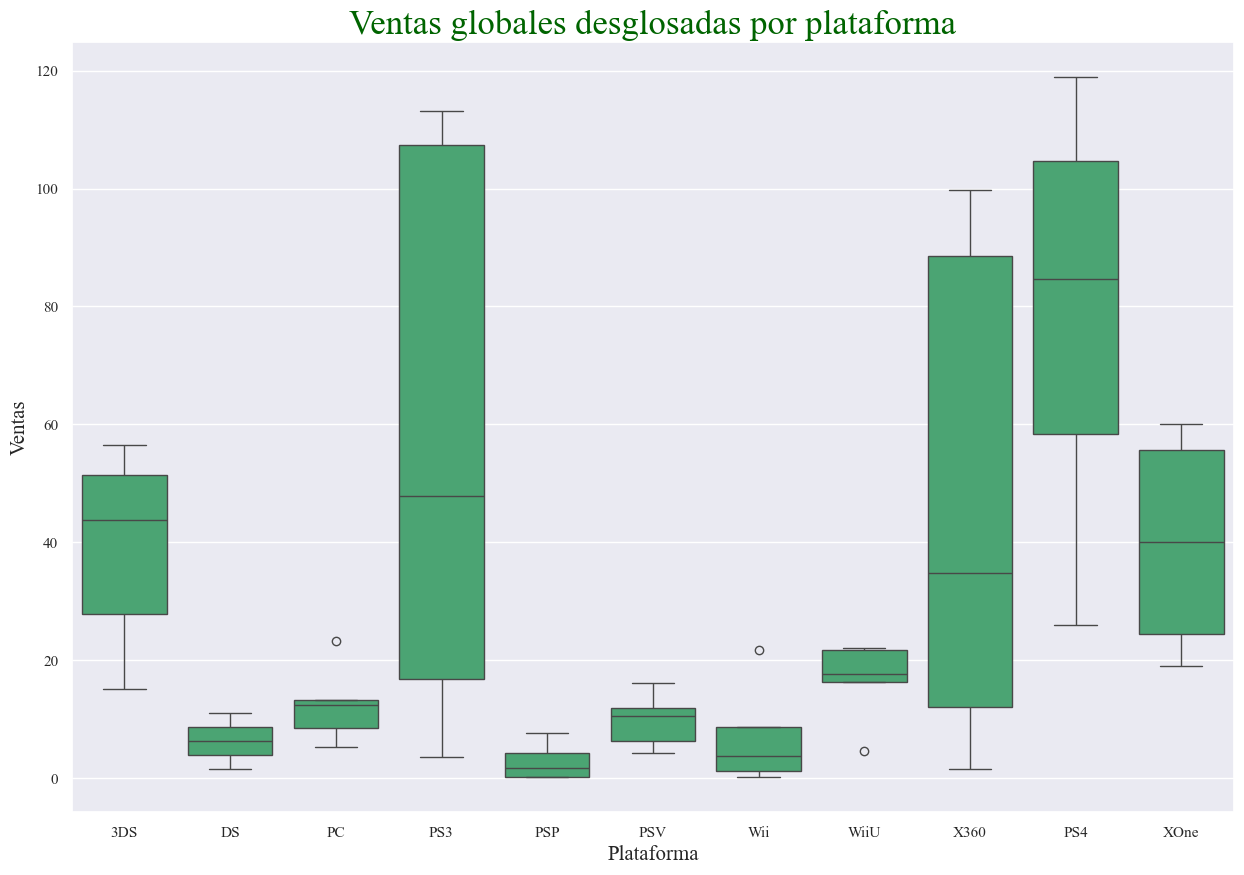

In [790]:
sns.boxplot(x="platform",y="ventas_totales",data=box_plot_data, color="#3CB371")
plt.title("Ventas globales desglosadas por plataforma", fontsize=25, color="#006400")
plt.xlabel("Plataforma", fontsize=15)
plt.ylabel("Ventas", fontsize=15)
plt.color_sequences

plt.show()

Las diferencias sí son significativas, se observa una variación importante entre las ventas de diferentes plataformas. Hay una alta dispersión en las ventas de PS3, PS4, X360 y XOne.

Para las ventas promedio de varias plataformas, estas varían considerablemente respecto a otras, las plataformas no tan populares (que no son Xbox ni PlayStation) tienen una media de ventas más "uniforme".

## Correlación

### Correlación para la plataforma PS4

In [791]:
PS4 = clean_data.groupby(["platform","name"])[["ventas_totales","critic_score","user_score"]].sum().query("platform == 'PS4' & critic_score > 0 & user_score >0").reset_index()
#Agrupa por plataforma y nombre, y realiza la suma de las columnas ventas_totales, critic_score y user_score. 
#Por último filtra dejando únicamente PS4 y que el puntaje de los críticos y usuarios sea positiva

#### Correlación PS4 Ventas totales y critic_score

In [792]:
ps4_corr = PS4["ventas_totales"].corr(PS4["critic_score"]) #Calcula la correlación entre las ventas totales Y el puntaje de la crítica
print("La correlación entre ventas y el puntaje de los críticos para PS4 es de: ", ps4_corr)

La correlación entre ventas y el puntaje de los críticos para PS4 es de:  0.40589480145836626


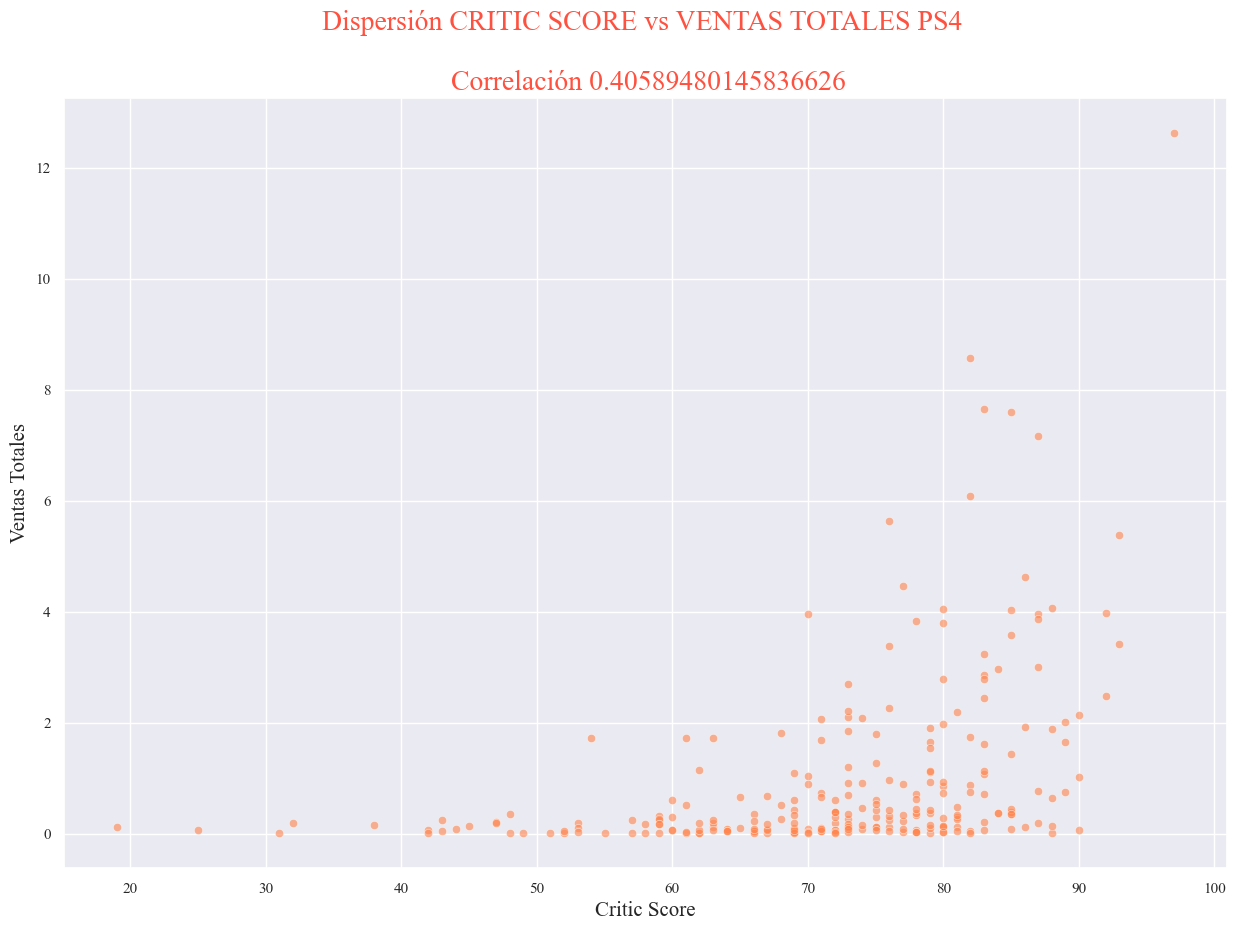

In [793]:
sns.scatterplot(data=PS4, x="critic_score",y="ventas_totales", color = "#ff854e", alpha = 0.6)
plt.title(f"Dispersión CRITIC SCORE vs VENTAS TOTALES PS4 \n\n Correlación {ps4_corr}", fontsize = 20, color = "#ff513f")
plt.ylabel("Ventas Totales", fontsize=15)
plt.xlabel("Critic Score", fontsize=15)
plt.show()

#### Correlación PS4 Ventas totales y user_score

In [794]:
ps4_corr_user = PS4["ventas_totales"].corr(PS4["user_score"])
print("La correlación entre ventas y el puntaje de los usuarios para PS4 es de: ", ps4_corr_user)

La correlación entre ventas y el puntaje de los usuarios para PS4 es de:  -0.03362497596528875


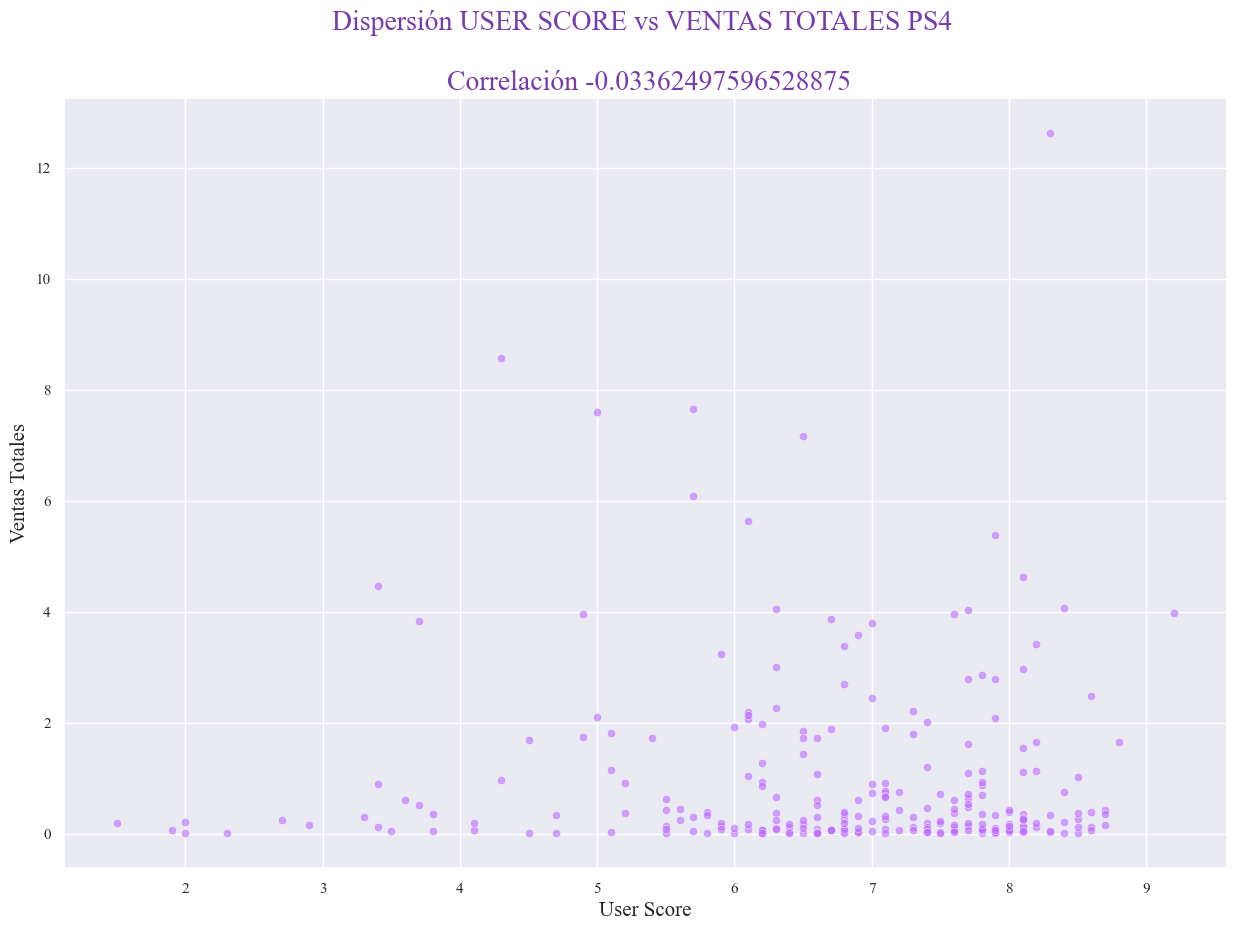

In [795]:
sns.scatterplot(data=PS4, x="user_score",y="ventas_totales", color = "#bc6bfe", alpha = 0.6)
plt.title(f"Dispersión USER SCORE vs VENTAS TOTALES PS4 \n\n Correlación {ps4_corr_user}", fontsize = 20, color = "#763cad")
plt.ylabel("Ventas Totales", fontsize=15)
plt.xlabel("User Score", fontsize=15)
plt.show()

In [874]:
def correlacion(plataforma):
    data=clean_data[clean_data["platform"] == plataforma]
    corr = data[["critic_score","user_score","ventas_totales"]].corr()["ventas_totales"]

    data.plot(y="ventas_totales", x="critic_score",kind="scatter",grid=True)
    plt.title(plataforma)

    data.plot(y="ventas_totales", x="user_score",kind="scatter",grid=True)
    plt.title(plataforma)

    print(plataforma, corr)
    print("---------------------------")

In [798]:
plataformas = ["PS4", "WiiU", "XOne", "PS3", "X360", "Wii"]

PS4 critic_score      0.406568
user_score       -0.031957
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
---------------------------
WiiU critic_score      0.348380
user_score        0.400219
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
---------------------------
XOne critic_score      0.416998
user_score       -0.068925
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
---------------------------
PS3 critic_score      0.331497
user_score       -0.005144
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
---------------------------
X360 critic_score      0.360573
user_score        0.006164
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
---------------------------
Wii critic_score     -0.424341
user_score        0.296197
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
---------------------------


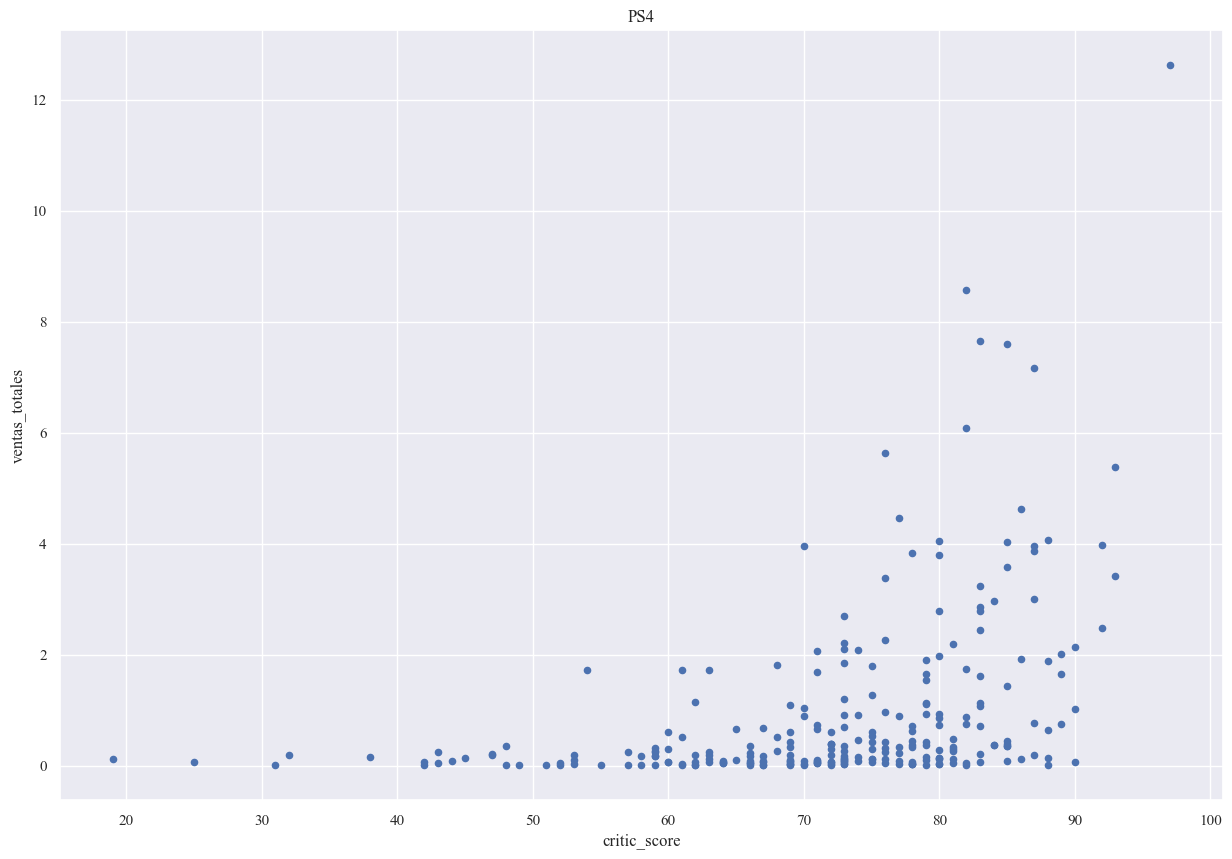

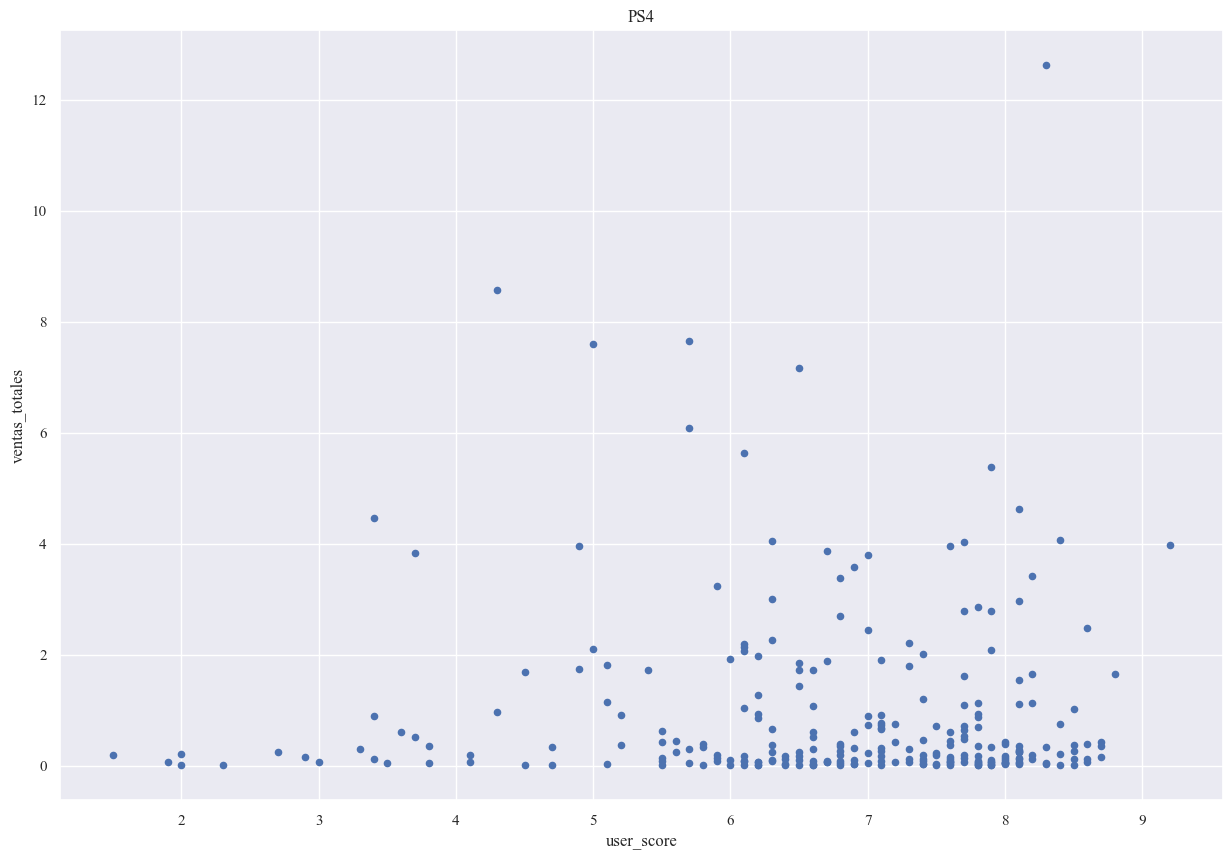

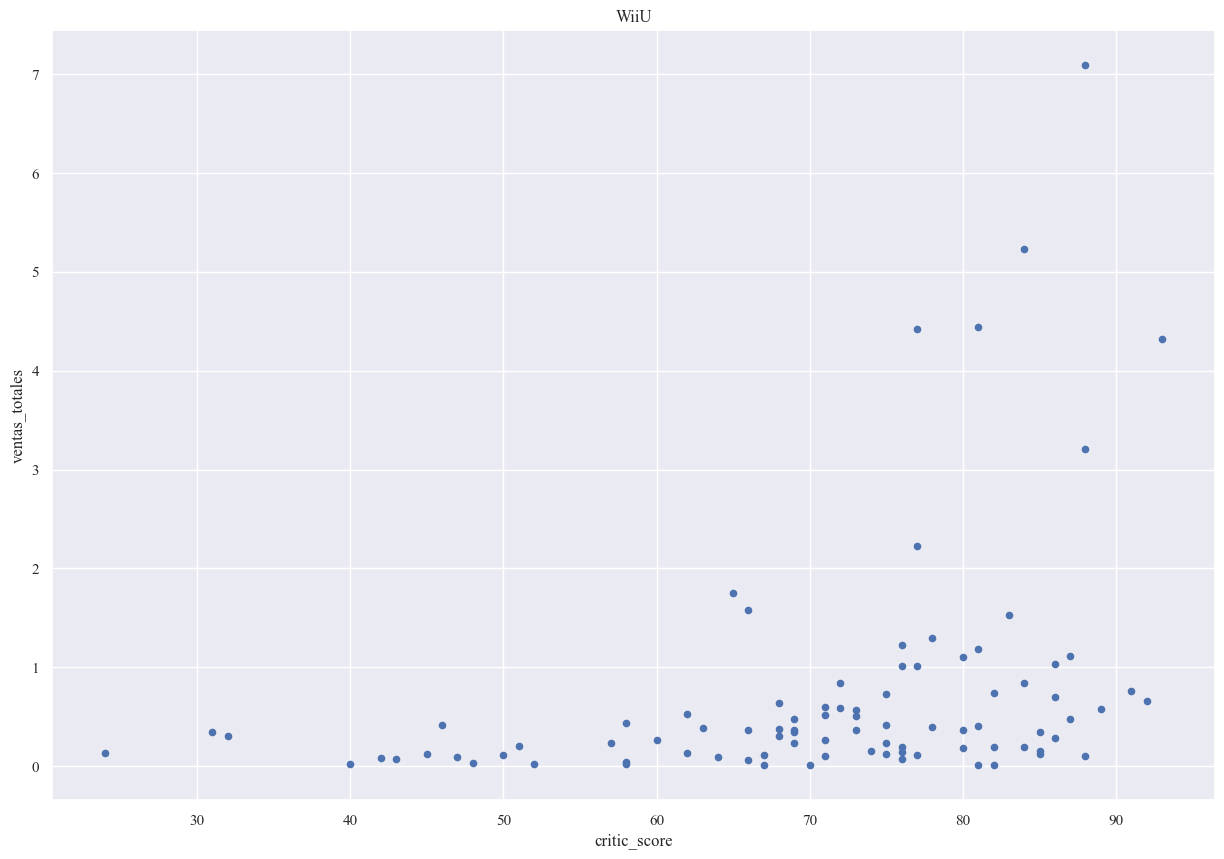

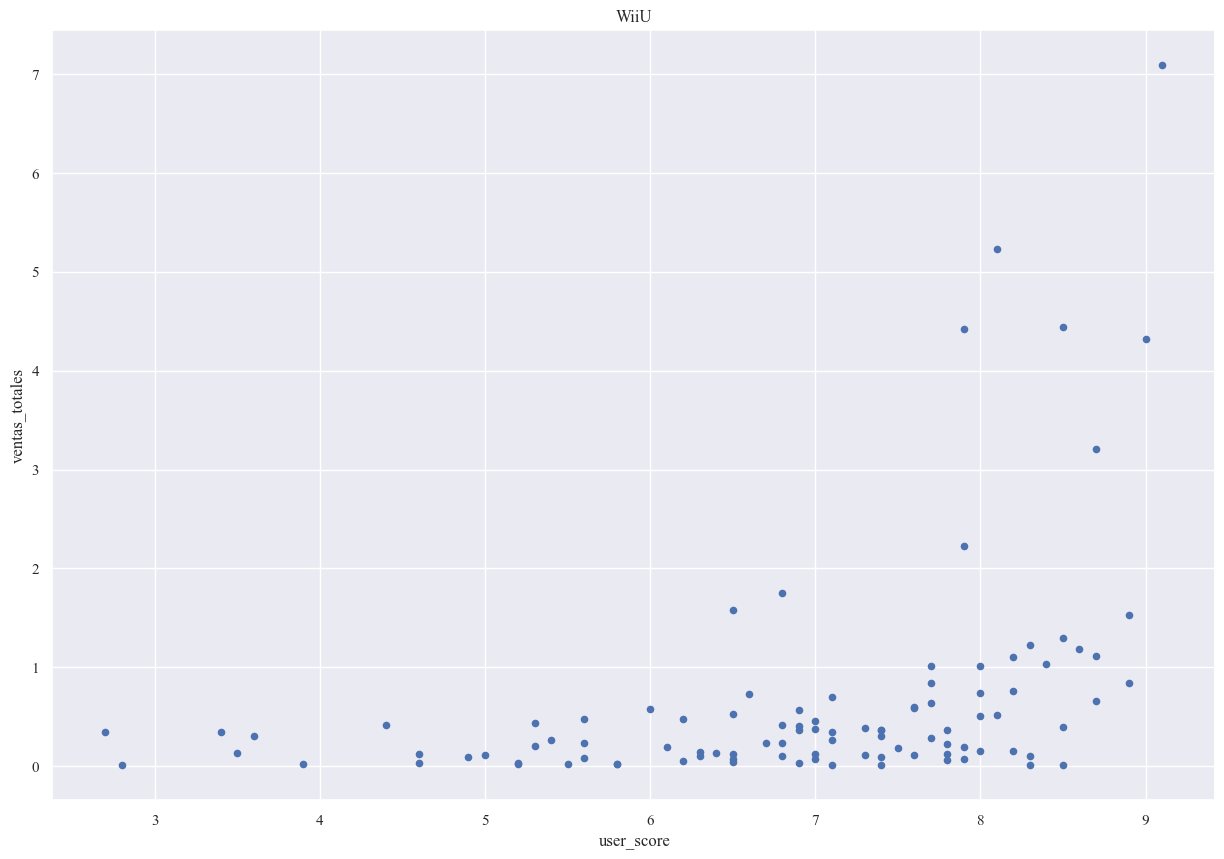

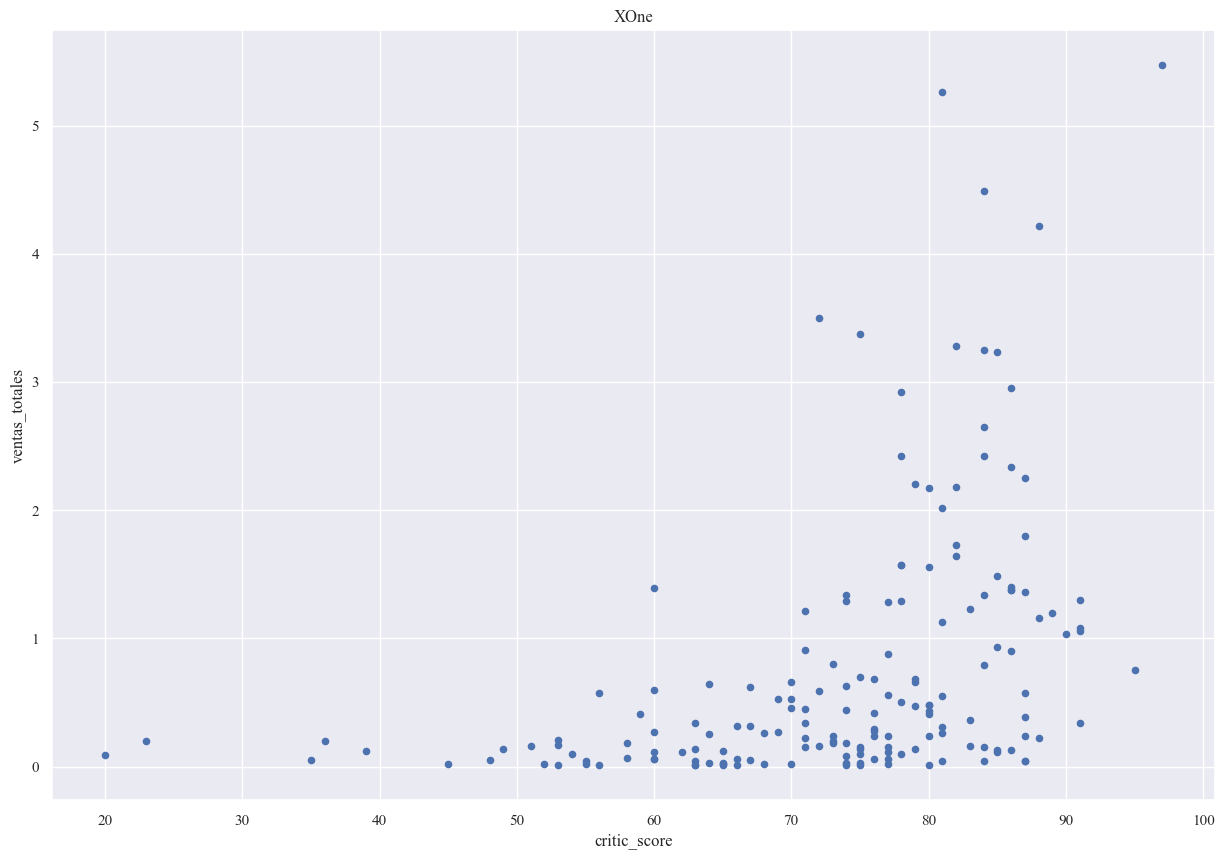

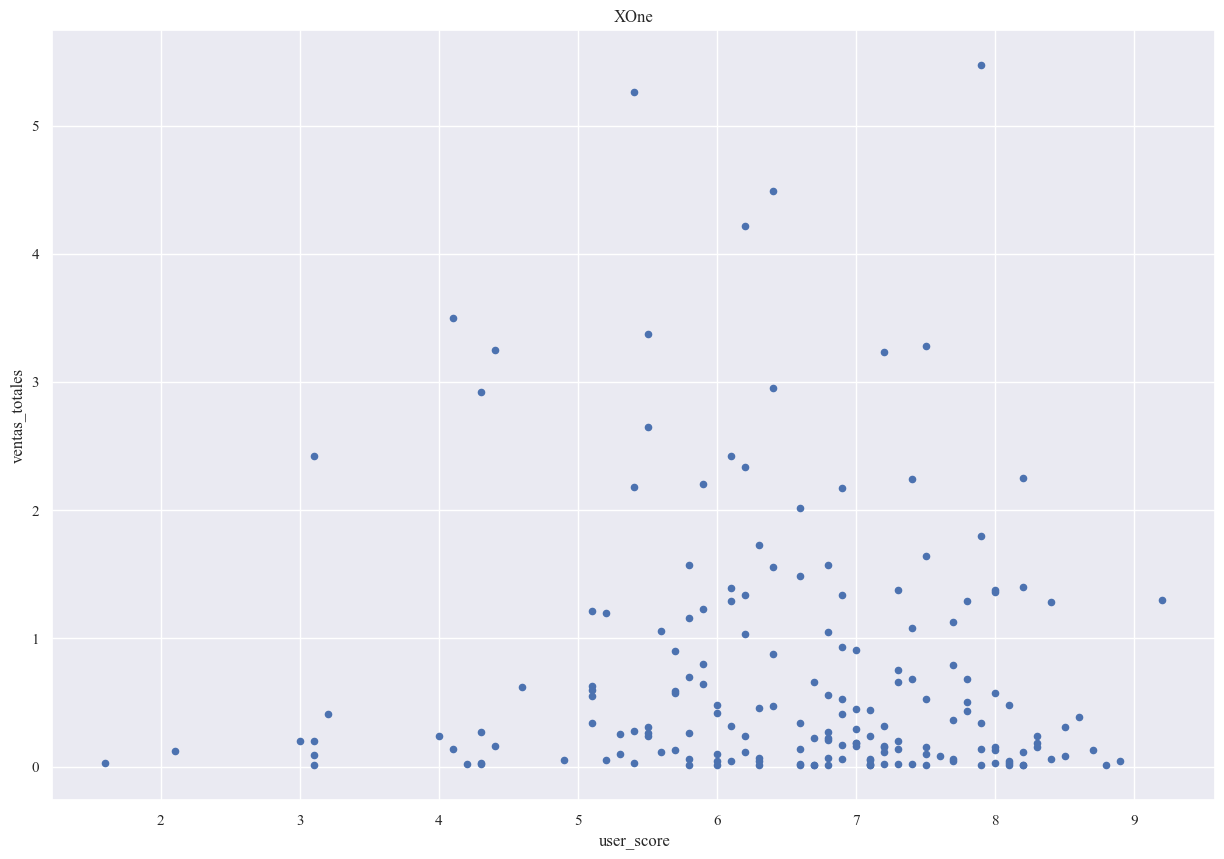

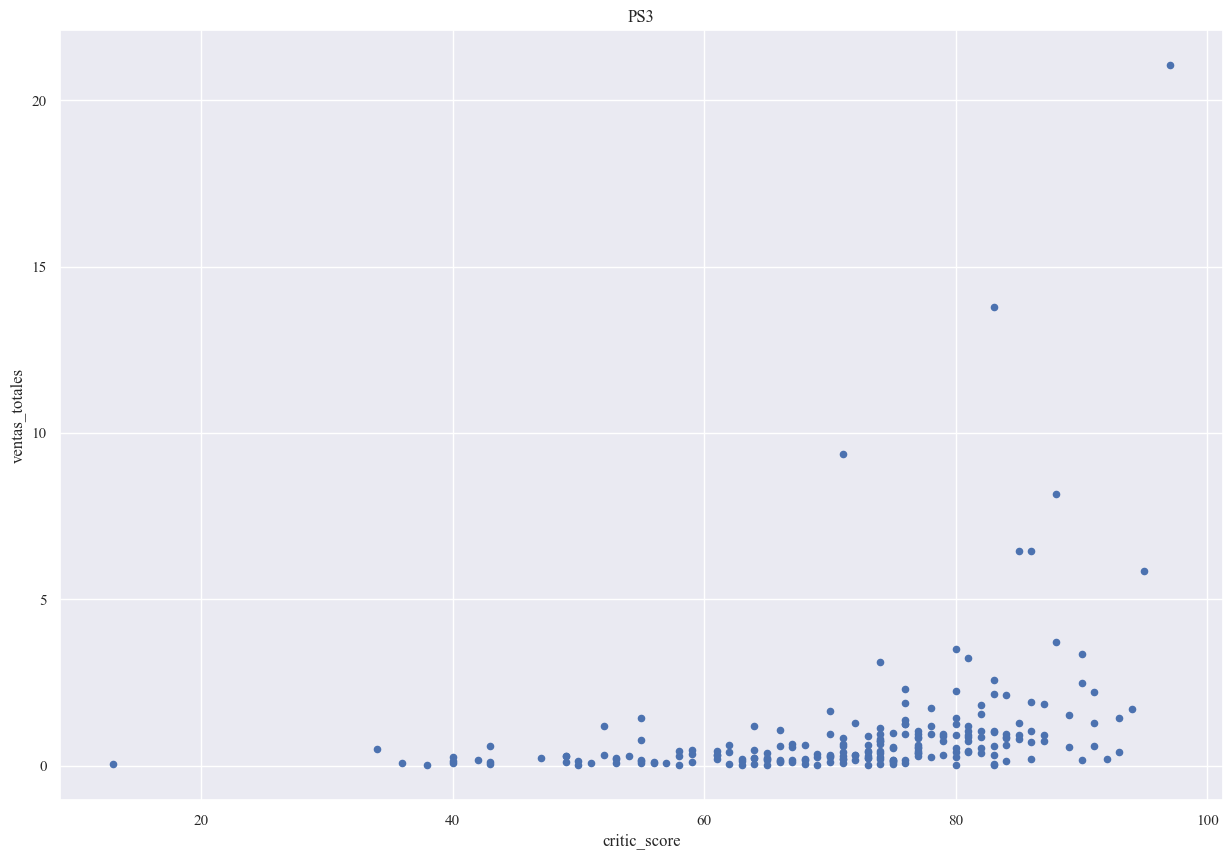

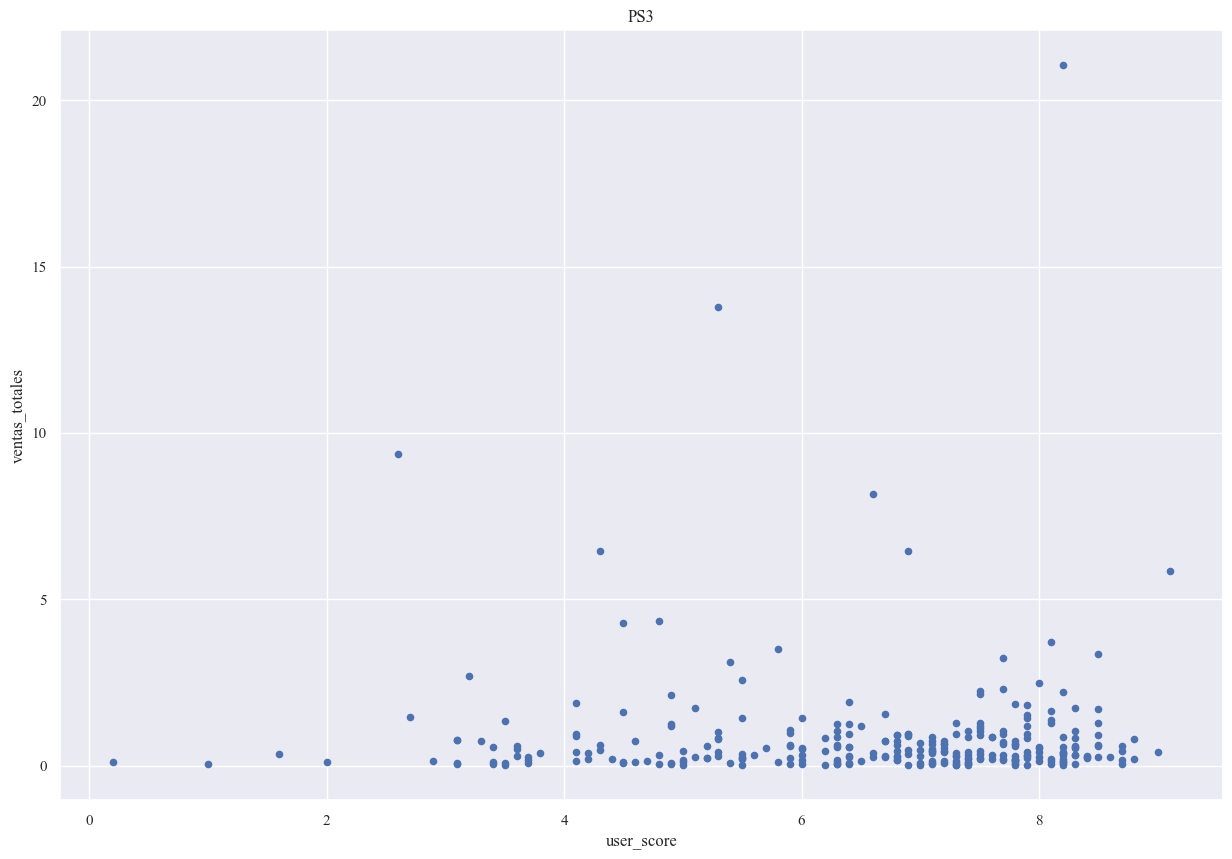

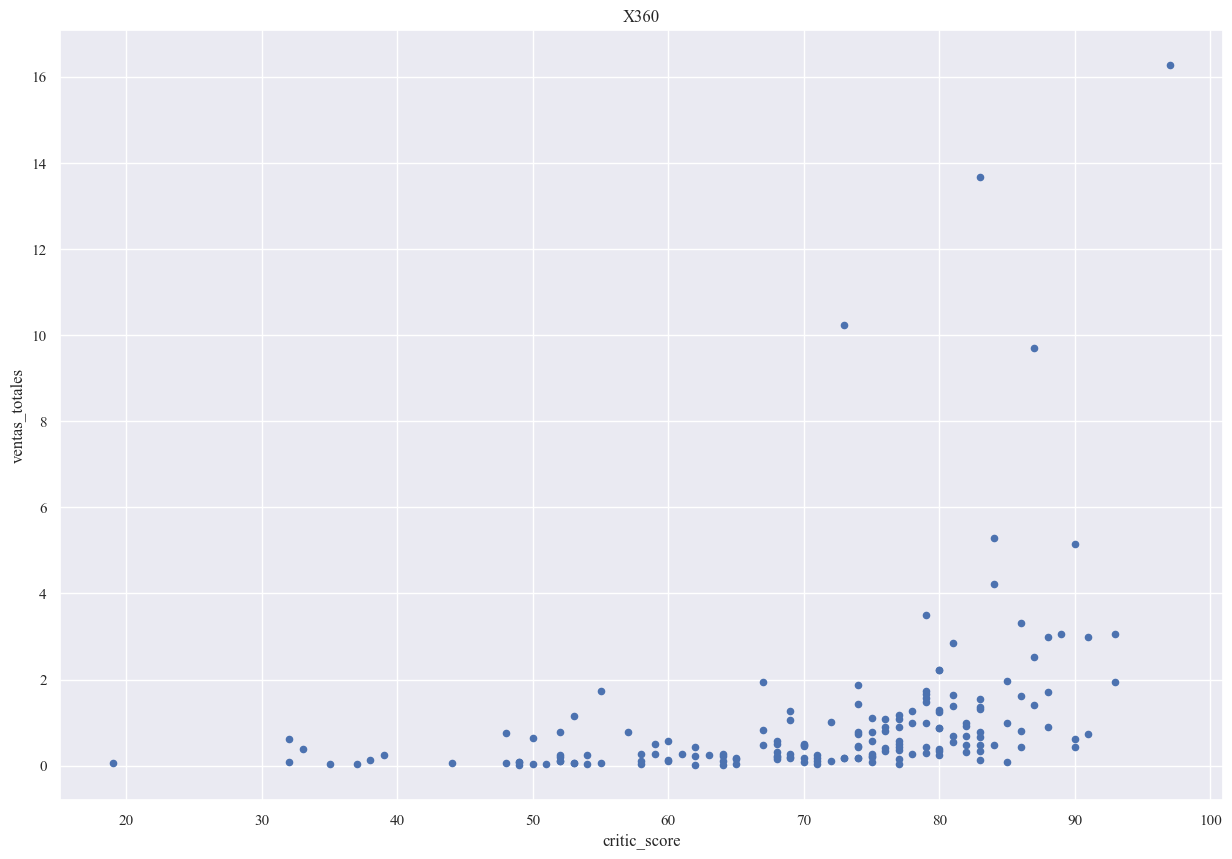

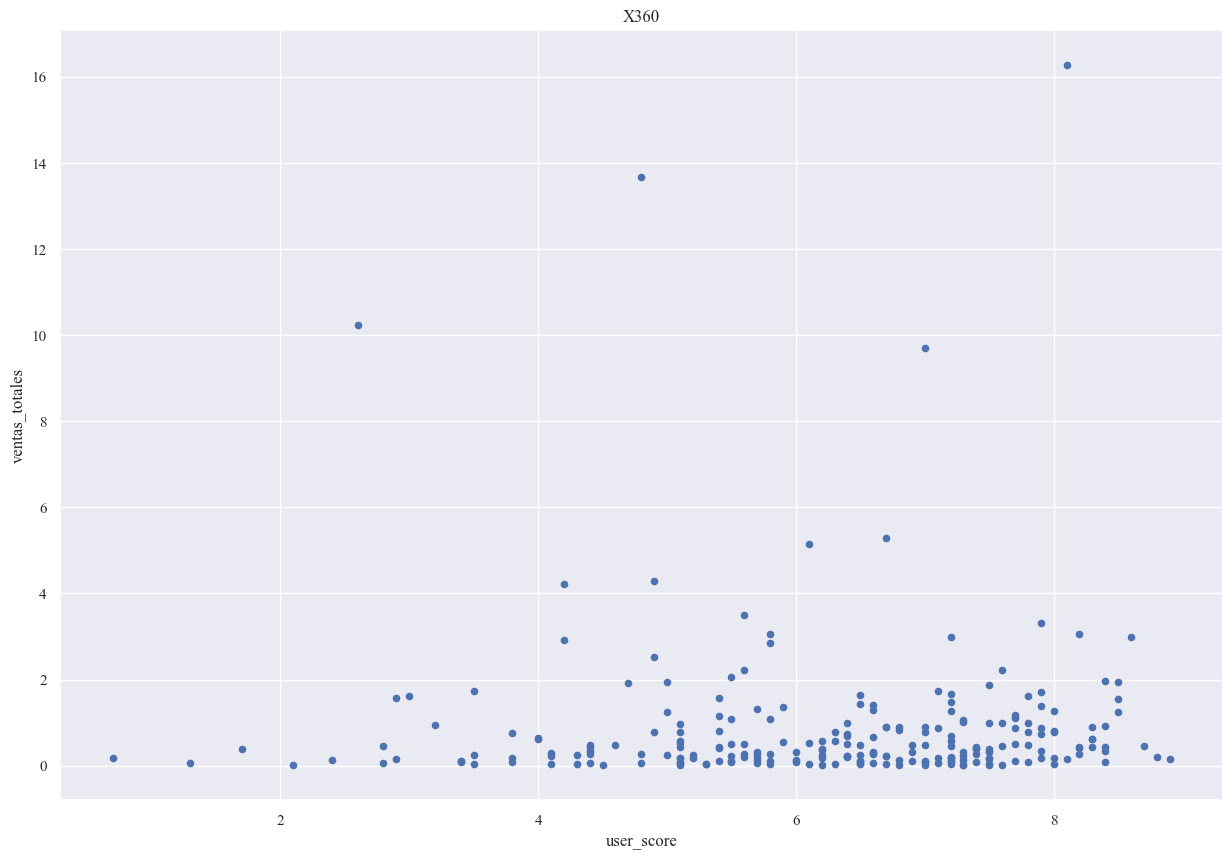

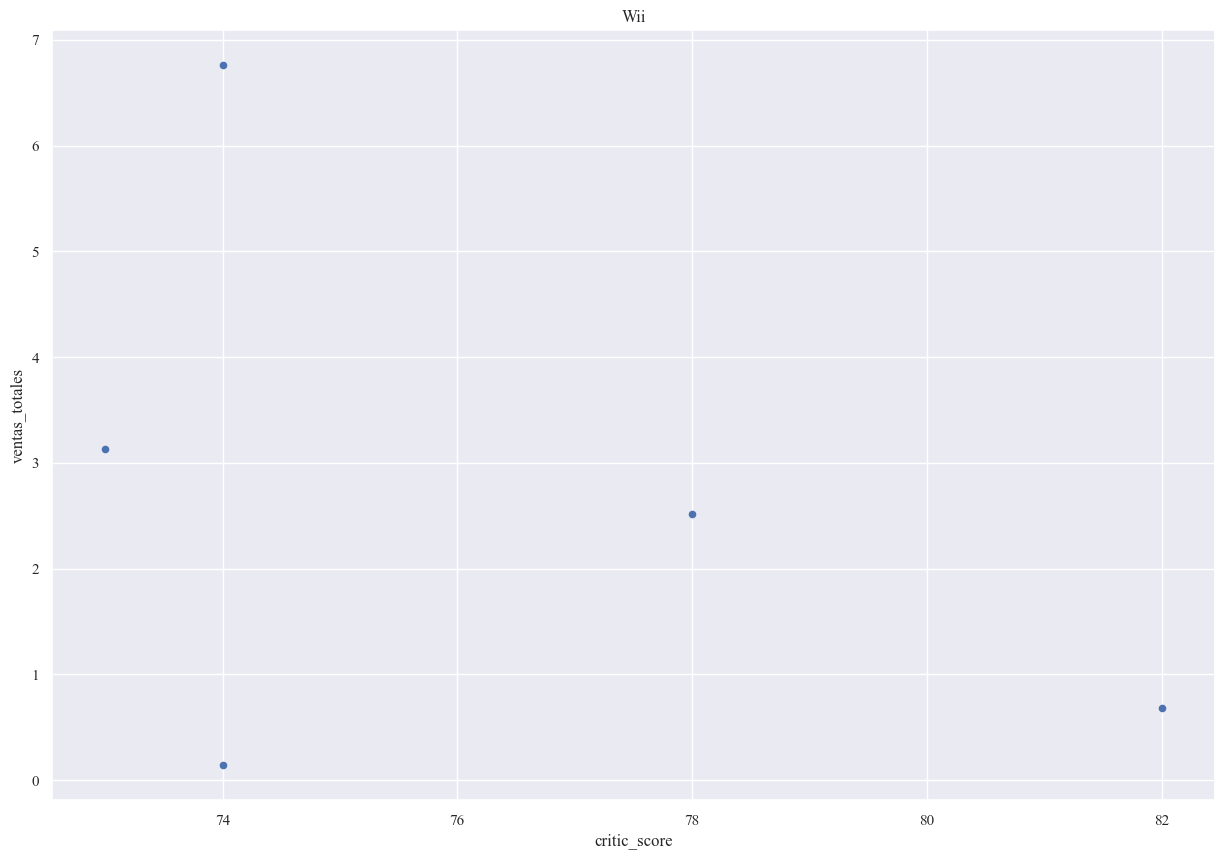

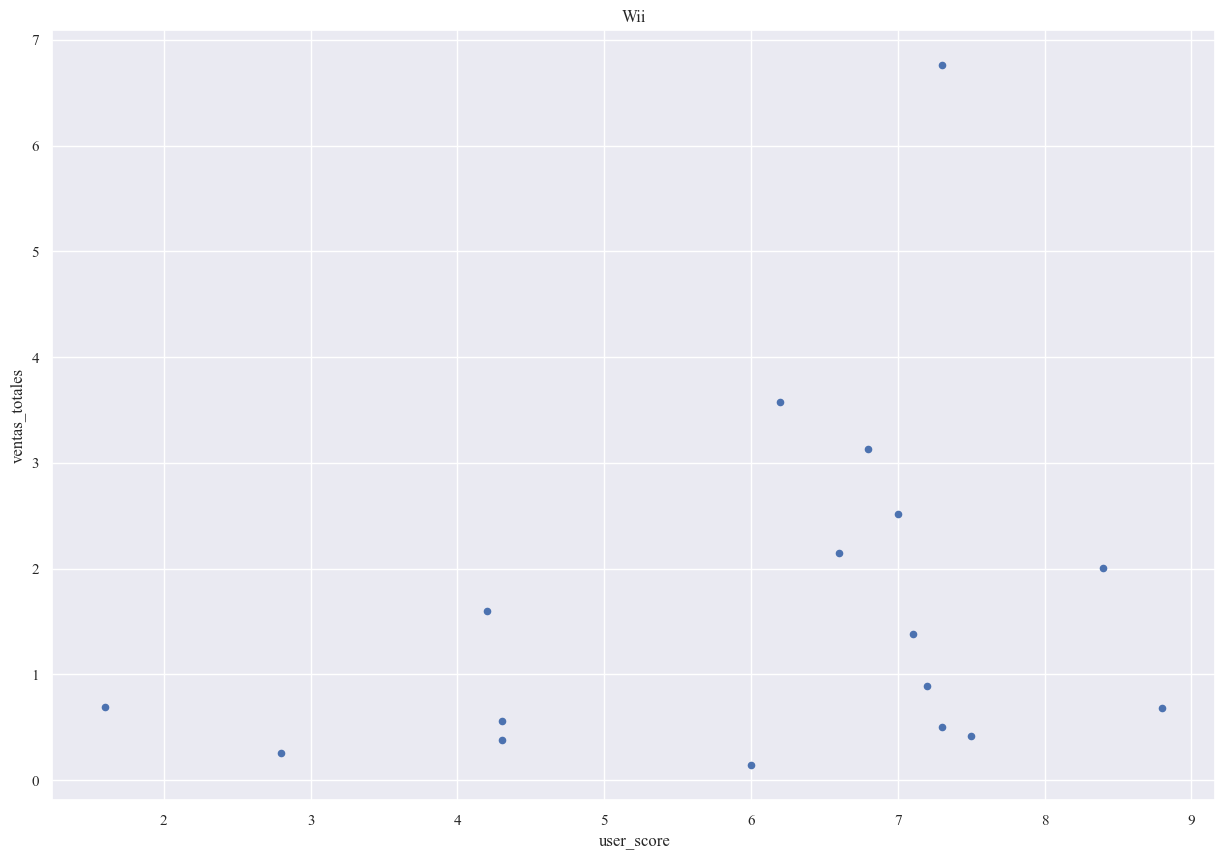

In [799]:
for plataforma in plataformas:
    correlacion(plataforma)

## ¿Qué se puede decir de los géneros más rentables?

In [800]:
datos_group_genero = clean_data.groupby(["genre","name"])["ventas_totales"].sum().reset_index()

In [801]:
datos_group_genero.query("1< ventas_totales < 10",inplace=True)

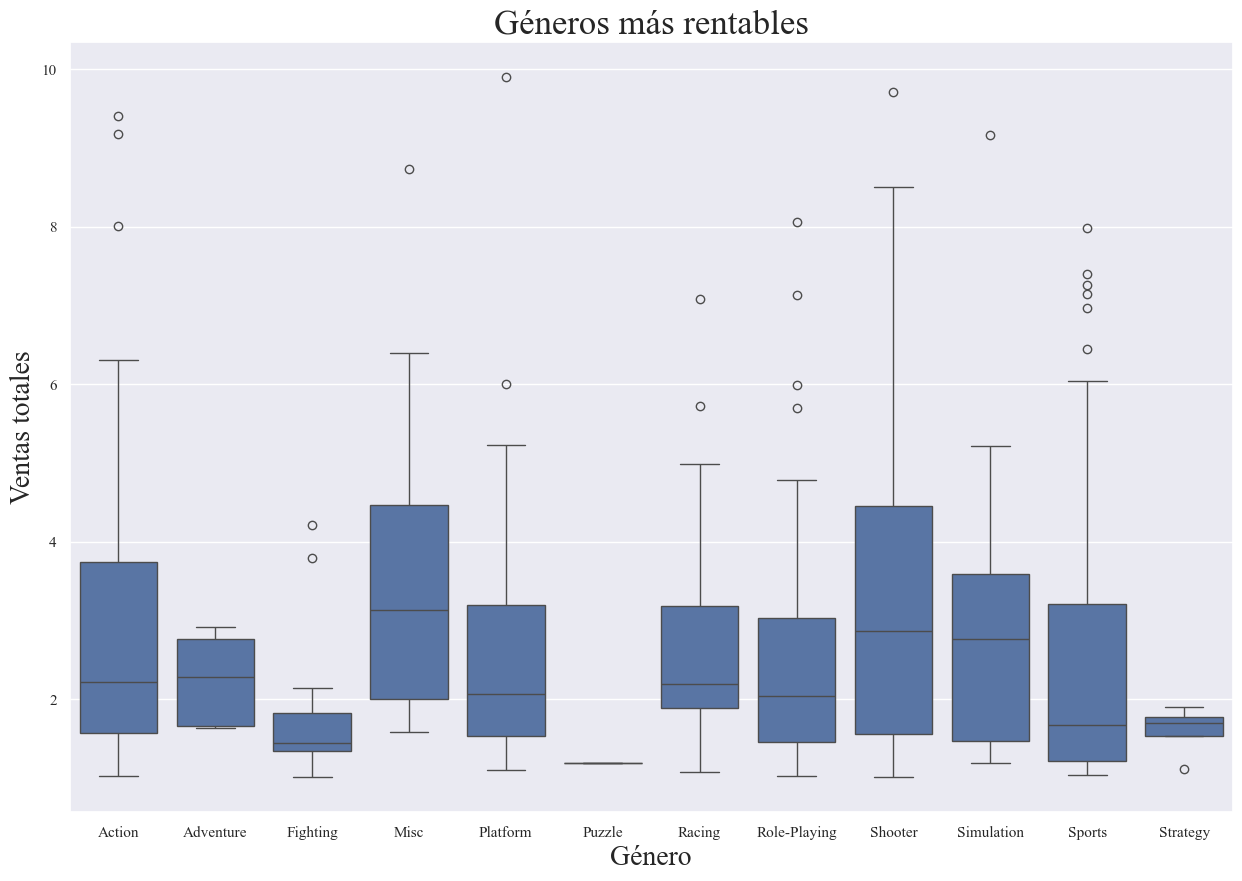

In [802]:
sns.boxplot(x="genre", y="ventas_totales", data=datos_group_genero)
plt.title("Géneros más rentables", fontsize=25)
plt.xlabel("Género", fontsize=20)
plt.ylabel("Ventas totales", fontsize=20)
plt.show()



Los shooters son los que más dispersión tiene, tiene el mayor rango de ventas y la venta promedio, quitando al MISC, es el que más venta promedio por plataforma tiene.

Los de mayor venta son Action, Shooter, Simulation y Sport, en común su rango de ventas es amplio y tienen valores outliers, indicando que pueden alcanzar ventas muy altas.

Por otro lado, los géneros con ventas bajas, tienen medianas bajas y menor dispersión, generando menos ventas en comparación con los antes descritos.

# 4. Perfil de usuario para cada región

### 5 plataformas principales

In [803]:
na_platforms = clean_data.groupby("platform")["na_sales"].sum().reset_index().sort_values(by="na_sales", ascending=False)
eu_platforms = clean_data.groupby("platform")["eu_sales"].sum().reset_index().sort_values(by="eu_sales", ascending=False)
jp_platforms = clean_data.groupby("platform")["jp_sales"].sum().reset_index().sort_values(by="jp_sales", ascending=False)

#### na_platforms

In [804]:
na_platforms["na_market_share"] = na_platforms["na_sales"]*100/na_platforms.sum()["na_sales"]

In [875]:
print(na_platforms.head(5))

   platform  na_sales  na_market_share
9      X360    140.05        23.698326
4       PS4    108.74        18.400257
3       PS3    103.38        17.493274
10     XOne     93.12        15.757145
0       3DS     55.31         9.359189


#### eu_platforms

In [806]:
eu_platforms["eu_market_share"] = eu_platforms["eu_sales"]*100/eu_platforms.sum()["eu_sales"]

In [876]:
print(eu_platforms.head(5))

   platform  eu_sales  eu_market_share
4       PS4    141.09        27.838286
3       PS3    106.86        21.084409
9      X360     74.52        14.703445
10     XOne     51.59        10.179156
0       3DS     42.64         8.413243


#### jp_platforms

In [808]:
jp_platforms["jp_market_share"] = jp_platforms["jp_sales"]*100/jp_platforms.sum()["jp_sales"]

In [877]:
print(jp_platforms.head(5))

  platform  jp_sales  jp_market_share
0      3DS     87.79        45.586250
3      PS3     35.29        18.324852
6      PSV     21.04        10.925330
4      PS4     15.96         8.287465
8     WiiU     13.01         6.755634


In [878]:
print(jp_platforms["jp_market_share"].sum())

100.0


#### Tabla comparativa por plataforma por regiones

In [811]:
principales_5_plataformas = na_platforms.merge(eu_platforms, on="platform", how="outer")
principales_5_plataformas = principales_5_plataformas.merge(jp_platforms, on="platform", how="outer")

In [879]:
print(principales_5_plataformas)

   platform  na_sales  na_market_share  eu_sales  eu_market_share  jp_sales  \
0       3DS     55.31         9.359189     42.64         8.413243     87.79   
1        DS      4.59         0.776689      3.53         0.696500      3.72   
2        PC     19.12         3.235359     37.76         7.450377      0.00   
3       PS3    103.38        17.493274    106.86        21.084409     35.29   
4       PS4    108.74        18.400257    141.09        27.838286     15.96   
5       PSP      0.13         0.021998      0.42         0.082870     10.47   
6       PSV     10.98         1.857962     11.36         2.241427     21.04   
7       Wii     17.45         2.952773     11.92         2.351920      3.39   
8      WiiU     38.10         6.447028     25.13         4.958368     13.01   
9      X360    140.05        23.698326     74.52        14.703445      1.57   
10     XOne     93.12        15.757145     51.59        10.179156      0.34   

    jp_market_share  
0         45.586250  
1      

##### Variaciones cuota de mercado por región

Si tomamos como punto de partida las principales plataformas en Norte Amércia (na_platforms) se observa que la plataforma con mayor cuota de mercado es X360, con un 23.7% del mercado, es decir, esta casi domina 1/4 del mercado, siendo bastante relevante. Sin embargo, una vez que se observa el comportamiento del marcado Europeo, X360 ocupa el tercer lugar ocupandos solo un 14.7% de dicho mercado, mientras que 2 versiones diferentes de la plataforma PlayStation ocupan el 48.8%, casi dominando la mitad.

En el mercado Japonés se observa un consumo interesante, en éste las 5 plataformas más populares son de origen nacional, es decir, no figura alguna plataforma extranjera, como los es Xbox. Podría decirse que el mercado Japones está dominado por Nintendo y PlaySation.

### 5 géneros principales por región

In [813]:
na_genres = clean_data.groupby("genre")["na_sales"].sum().reset_index().sort_values(by="na_sales", ascending=False)
eu_genres = clean_data.groupby("genre")["eu_sales"].sum().reset_index().sort_values(by="eu_sales", ascending=False)
jp_genres = clean_data.groupby("genre")["jp_sales"].sum().reset_index().sort_values(by="jp_sales", ascending=False)

#### na_genres

In [814]:
na_genres["na_market_share"] = na_genres["na_sales"]*100/na_genres.sum()["na_sales"]

In [880]:
print(na_genres.head())

           genre  na_sales  na_market_share
0         Action    177.84        30.092898
8        Shooter    144.77        24.497013
10        Sports     81.53        13.795963
7   Role-Playing     64.00        10.829653
3           Misc     38.19         6.462257


#### eu_genres

In [816]:
eu_genres["eu_market_share"] = eu_genres["eu_sales"]*100/eu_genres.sum()["eu_sales"]

In [881]:
print(eu_genres.head(5))

           genre  eu_sales  eu_market_share
0         Action    159.34        31.439170
8        Shooter    113.47        22.388619
10        Sports     69.09        13.632059
7   Role-Playing     48.53         9.575392
6         Racing     27.29         5.384555


#### jp_genres

In [818]:
jp_genres["jp_market_share"] = jp_genres["jp_sales"]*100/jp_genres.sum()["jp_sales"]

In [882]:
print(jp_genres.head(5))

          genre  jp_sales  jp_market_share
7  Role-Playing     65.44        33.980683
0        Action     52.80        27.417177
3          Misc     12.86         6.677744
9    Simulation     10.41         5.405546
2      Fighting      9.44         4.901859


In [820]:
principales_5_generos = na_genres.merge(eu_genres, on="genre", how="outer")
principales_5_generos = principales_5_generos.merge(jp_genres, on="genre", how="outer")

#### Tabla comparativa por género por regiones

In [883]:
print(principales_5_generos)

           genre  na_sales  na_market_share  eu_sales  eu_market_share  \
0         Action    177.84        30.092898    159.34        31.439170   
1      Adventure      8.92         1.509383      9.46         1.866540   
2       Fighting     19.79         3.348732     10.79         2.128961   
3           Misc     38.19         6.462257     26.32         5.193165   
4       Platform     25.38         4.294634     21.41         4.224379   
5         Puzzle      1.13         0.191211      1.40         0.276232   
6         Racing     17.22         2.913853     27.29         5.384555   
7   Role-Playing     64.00        10.829653     48.53         9.575392   
8        Shooter    144.77        24.497013    113.47        22.388619   
9     Simulation      7.97         1.348630     14.55         2.870842   
10        Sports     81.53        13.795963     69.09        13.632059   
11      Strategy      4.23         0.715772      5.17         1.020086   

    jp_sales  jp_market_share  
0    

#### Principales géneros globales

In [884]:
print(clean_data.groupby("genre")["ventas_totales"].sum().reset_index().sort_values(by="ventas_totales",ascending=False).head(5))

           genre  ventas_totales
0         Action          441.12
8        Shooter          304.73
7   Role-Playing          192.80
10        Sports          181.07
3           Misc           85.04


En Norte América como en Europa se observan comportamientos similares, incluso cuotas de mercado regional muy parejas, solo cambian en la quinta posición, mientras en Norte América se encuentran los "Misc", en Europa están los "Racing" con cuotas similares. Entre Action y Shooter tinene prácticamente la mitad del mercado en ambas regiones.

Nuevamente, para Japón el comportamiento es distinto, pues en este mercado el género más vendido es el de "Role-Playing", dicho género domina el 60% del mercado, dejando por detrás al resto. Como diferencia respecto a las regiones anteriores, en este aparecen generos como "Simulation" y Fighting. 

En la tabla "Principales géneros globales" podemos observar que los primeros dos puestos, "Action" y "Shooter" están influenciados por la región Norte Americana y Europea, mientras que el tercer puesto lo influencia Japón, lo que indica la relevancia que tiene este país en las ventas globales de videojuegos de "Role-Playing"

## Clasificación ESRB (rating) en las ventas regionales individuales

### Ventas regionales por ESRB

In [823]:
ventas_regionales_esrb = clean_data.groupby(["rating"])[["na_sales","eu_sales","jp_sales"]].sum().reset_index()

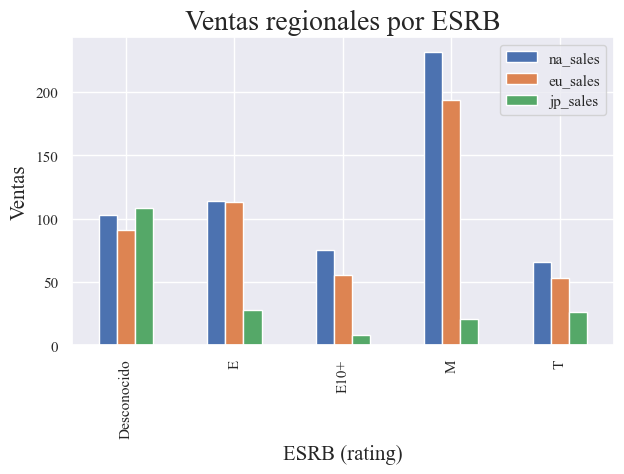

In [824]:
ventas_regionales_esrb.plot(x="rating", kind="bar", figsize=(7,4))
plt.title("Ventas regionales por ESRB", fontsize=20)
plt.xlabel("ESRB (rating)",fontsize=15)
plt.ylabel("Ventas", fontsize=15)

plt.show()

#### Ventas Japón por ESRB

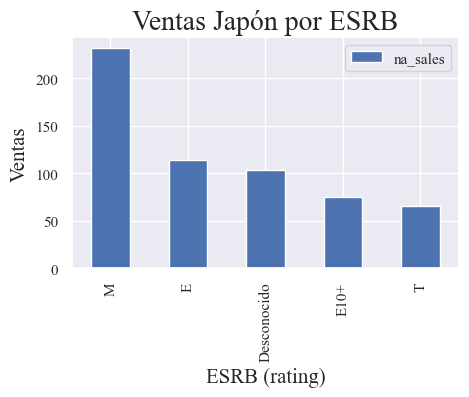

In [825]:
ventas_jp_esrb = clean_data.groupby(["rating"])[["na_sales"]].sum().sort_values(by="na_sales", ascending=False).reset_index()

ventas_jp_esrb.plot(x="rating", kind="bar", figsize=(5,3))
plt.title("Ventas Japón por ESRB", fontsize=20)
plt.xlabel("ESRB (rating)",fontsize=15)
plt.ylabel("Ventas", fontsize=15)

plt.show()

#### Ventas Europa por ESRB

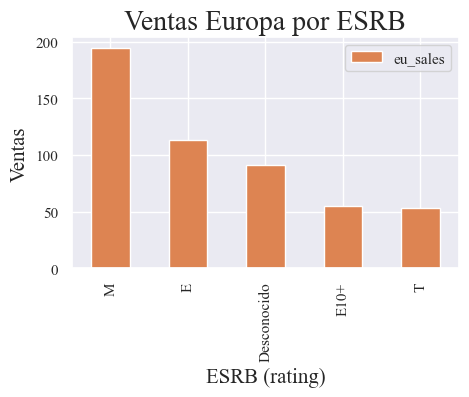

In [826]:
ventas_eu_esrb = clean_data.groupby(["rating"])[["eu_sales"]].sum().sort_values(by="eu_sales", ascending=False).reset_index()

ventas_eu_esrb.plot(x="rating", kind="bar", figsize=(5,3), color="#dd8452")
plt.title("Ventas Europa por ESRB", fontsize=20)
plt.xlabel("ESRB (rating)",fontsize=15)
plt.ylabel("Ventas", fontsize=15)

plt.show()

#### Ventas Norteamérica por ESRB

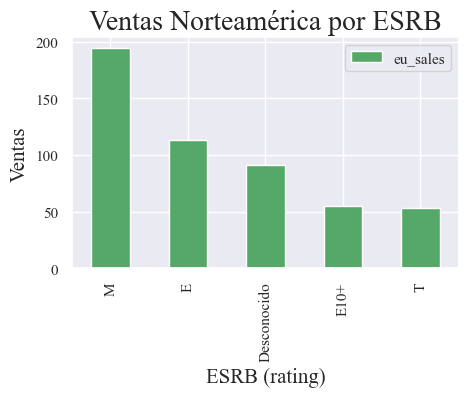

In [827]:
ventas_na_esrb = clean_data.groupby(["rating"])[["eu_sales"]].sum().sort_values(by="eu_sales", ascending=False).reset_index()

ventas_na_esrb.plot(x="rating", kind="bar", figsize=(5,3), color="#55a868")
plt.title("Ventas Norteamérica por ESRB", fontsize=20)
plt.xlabel("ESRB (rating)",fontsize=15)
plt.ylabel("Ventas", fontsize=15)

plt.show()

In [885]:
print(clean_data.groupby(["platform","rating"])[["na_sales","eu_sales","jp_sales"]].sum().sort_values(by=["rating"]).reset_index())

   platform       rating  na_sales  eu_sales  jp_sales
0       3DS  Desconocido     24.75     20.21     60.00
1       PSP  Desconocido      0.00      0.00      9.87
2       PS3  Desconocido     12.15     12.44     11.23
3       PSV  Desconocido      1.94      2.39     12.86
4       Wii  Desconocido      1.21      0.69      2.24
5      WiiU  Desconocido      6.71      4.01      2.84
6        PC  Desconocido      1.23      5.81      0.00
7        DS  Desconocido      3.18      2.18      3.35
8      X360  Desconocido     13.74      7.48      0.15
9      XOne  Desconocido     14.63      8.30      0.05
10      PS4  Desconocido     23.77     27.99      6.25
11      PS4            E     16.76     27.56      0.84
12      Wii            E      2.70      2.82      0.82
13      PSV            E      1.75      2.44      0.16
14     X360            E     24.07     14.30      0.05
15     XOne            E     14.40     10.46      0.04
16     WiiU            E     15.39     10.16      6.66
17      PS

Sí, las clasificaciones de ESRB pueden afectar las ventas de videojuegos en regiones individuales. La clasificación de un juego puede influir en su accesibilidad y aceptación en diferentes mercados. Por ejemplo, los juegos clasificados como "E" (Everyone) tienden a tener mayores ventas en todas las regiones debido a su accesibilidad a una audiencia más amplia, incluyendo niños y familias.

En contraste, los juegos clasificados como "M" (Mature) pueden tener ventas más altas en regiones donde hay una mayor aceptación de contenido maduro, como América del Norte, pero pueden tener ventas más bajas en regiones con restricciones más estrictas sobre el contenido para adultos, como Japón

# 5. Prueba de hipótesis

## Xbox One y PC

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [849]:
#H0 = Las calificaciones promedio de los usuarios son las mismas
#H1 = Las calificaciones promedio de los ususarios son DIFERENTES

alpha = 0.05

usuarios_xbox_one = clean_data.query("platform == 'XOne'")["user_score"].dropna()
usuarios_pc = clean_data.query("platform == 'PC'")["user_score"].dropna()

results_usuarios = st.ttest_ind(usuarios_xbox_one,usuarios_pc, equal_var=False)

print("Valor p: ", results_usuarios.pvalue)

if results_usuarios.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p:  0.5489537965134912
No podemos rechazar la hipótesis nula


## Acción y Deportes

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [866]:
#HO = Las calificaciones promedio son iguales
#H1 = Las calificaciones promedio son diferentes

alpha = 0.05

usuarios_accion = clean_data.query("genre == 'Action'")["user_score"].dropna()
usuarios_deportes = clean_data.query("genre == 'Sports'")["user_score"].dropna()

results_generos = st.ttest_ind(usuarios_accion,usuarios_deportes, equal_var=False)

print("Valor p: ", results_generos.pvalue)

if results_generos.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p:  4.24307776572644e-20
Rechazamos la hipótesis nula


#### ¿Cómo se formularon las hipótesis?

Para el caso de las plataformas formulé la hipótesis núla bajo el supuesto que las calificaciones para ambos géneros son iguales, por lo que si esta se rechazaba, son diferentes. Con el resultado obtenido, no se rechaza la hipótesis nula, entonces el promedio de calificaciones son iguales.

En la prueba de los géneros, la hipótesis nula se estableció como que son iguales, al ser rechazada, la hipótesis alternativa es que son diferentes y es esta la que expresa la idea de que existe una diferencia.


#### ¿Qué criterio se utilizó?

El criterio para probar las hipótesis planteadas fue realizar una Ttest, ya que se buscaba comprobar que las medias de dos poblaciones son iguales (o no).  

# Conclusión general

Al lo largo de los años los videojuegos han cobrado relevancia en los mercados y se han visto impulsados por el desarrollo de nuevas tecnologías que permiten existan diferentes plataformas (empresas) que exploten este mercado. Sin embargo, en este dataset podemos observar como, al igual que en otras industrias, hay empresas que dominan el mercado, ya sea por popularidad, tecnología o poder económico. En las decadas anteriores al 2000 se podían observar variedad de plataformas de diferentes fabricantes que fueron los precursores de los videojuegos de hoy en día. 

El mercado se encuentra prácticamente dominado por Microsoft, Nintendo y Sony, quienes compiten por la presencia de mercado en diferentes regiones del mundo. Permiténdonos comparar este dataset con la actualidad, no ha cambiado mucho la posición de los últimos años, por lo que concluimos que sus plataformas y géneros más populares son rentables y que tienen una perspectiva de crecimiento.